# MBAI 448 | Week 3 Walkthrough: AI & Machine Learning Fundamentals

# MBAI 448 | Week 3 Walkthrough: AI & Machine Learning Fundamentals

##### Walkthrough Overview

This walkthrough explores how statistical learning can be applied to a real-world problem. It is organized into three Acts:

- Act I: Understand the problem and context
- Act II: Prototype a solution with AI technology
- Act III: Socialize the work with stakeholders

##### Walkthrough Tools

This walkthrough assumes you will be working with Github Copilot in VS Code, and will require you to submit your chat history along with this notebook. If you are curious about how to work effectively with Github Copilot, please consult the [VS Code documentation](https://code.visualstudio.com/docs/copilot/overview).

Submissions that demonstrate thoughtless interaction with Copilot (e.g., asking Copilot to just read the notebook and produce all the outputs) will receive reduced credit.

### Act 1 : Understand the problem and context

##### Business Goal / Case Statement
Identify and qualify shopper segments that can be useful in future marketing contexts to drive incremental revenue.

##### Assignment Context

**Relevant Industry and/or Business Function:** Shopper Marketing

##### The Data

**Data Location:** <code>'./data/customer_detail.csv'</code>

#### Step 0 : Scope the work in `agents.md`

Before moving forward, create a a file named `agents.md` in the project root directory (likely the same level of the directory in which this notebook lives). This file specifies the intended role of AI in this project and serves as reference context for Github Copilot as you work.

Your `agents.md` must include the following five sections:

##### 1. What we’re building
A one-sentence "elevator pitch" describing the prototype and its primary output (e.g., "A predictive lead-scoring engine that identifies high-value customers based on historical CRM data.")

##### 2. How AI helps solve the business problem
2–4 bullet points explaining the specific value-add of the AI components. Focus on the transition from the business "pain point" to the AI "solution."

##### 3. Key file locations and data structure
List the paths that matter (e.g., `./mbai448_week03_assignment.ipynb`, `./data/attrition.csv`).

##### 4. High-level execution plan
A step-by-step outline of the build process (e.g., 1. Data processing, 2. Model training, 3. Evaluation, 4. Model tuning). Feel free to ask Copilot for help (or take a peek at the steps in Act II below) for a sense on structuring the work.

##### 5. Code conventions and constraints
To ensure the prototype remains manageable, add 1-2 bullet points specifying that code be as simple and straightforward, using standard libraries unless instructed otherwise.

### Act 2 : Prototype a solution with AI technology

## Prototyping a Shopper Segmentation System

In this act, you will prototype a workflow that uses shopper data to:

- segment the customers into cohorts using unsupervised learning, and  
- train classifiers that estimate commercial value.

This is meant to be an exploratory prototype, to better understand how how shopper representations, clustering approaches, and predictive models can help to identify high-value customers.

You are encouraged to use GitHub Copilot throughout. For each step, follow the same disciplined loop:

- **Plan**: Have Copilot create a short, narrative plan describing what needs to happen and what artifacts will be produced.
- **Validate**: Review and revise that plan until it is complete, coherent, and aligned with the purpose of the step.
- **Execute**: Once the plan is validated, have Copilot implement it in code.
- **Check**: Use the resulting code to perform one or two concrete actions that confirm you have what you need.

#### Environment Setup

To run this notebook locally as you move through the assignment, we suggest you create and activate a Python virtual environment.

From the project root directory:

##### On MacOS/Linux:
`python -m venv venv
`source venv/bin/activate

##### On Windows:
`python -m venv venv
`venv\Scripts\activate

Once your virtual environment is activated, you can set it as the kernel for this notebook in the top right corner of your notebook pane.


## Step 1: Load the dataset

Before any modeling, you need to understand what a single row represents and what information is available about each shopper.

### Plan
Have Copilot create a plan to load the shopper dataset from './data/customer_detail.csv', inspect its structure, and display a small sample of rows.

### Validate
- treat each row as a single shopper record
- surface column names and data types
- produce visible output rather than silent assignments

### Execute
Implement the validated plan in code.

### Check
- Print the dataset shape and list of columns.
- Display 3–5 rows and confirm they read like plausible shopper profiles.

In [ ]:
# write code below

import pandas as pd

data = pd.read_csv("./data/customer_detail.csv")

data.head()

customer_id customer_dob customer_degree customer_married  \
0         2048      6/27/72             GED               No   
1         5827      7/19/71       Doctorate              Yes   
2         6530     10/25/81      Bachelor's               No   
3         1506      4/13/64             GED              Yes   
4         3725      8/29/72             GED              Yes   

  customer_annual_salary customer_annual_bonus  customer_num_children  \
0            $63,047.00                 $0.00                       1   
1            $32,271.00                 $0.00                       1   
2            $25,845.00             $1,976.00                       1   
3            $54,673.00            $10,780.00                       2   
4            $61,276.00                 $0.00                       1   

   customer_num_other_relatives customer_date  customer_validity  ...  \
0                             0       3/23/14                NaN  ...   
1                             0      10/17/12                NaN  ...   
2                             1      12/14/12                NaN  ...   
3                             2       5/27/13                NaN  ...   
4                             1        7/8/13                NaN  ...   

   customer_instore_promos  customer_app_promos  customer_online_purchases  \
0                        2                    1                          7   
1                        2                    1                          1   
2                        2                    1                          1   
3                        4                    2                          4   
4                        8                    2                         13   

   customer_instore_purchases  customer_app_purchases  \
0                          15                       5   
1                           2                       0   
2                           2                       0   
3                           6                       1   
4                          14                       2   

   customer_app_minutes_per_trip  customer_online_minutes_per_trip  \
0                              8                                12   
1                             21                                27   
2                             15                                19   
3                              7                                 9   
4                             15                                21   

   customer_databank_status  customer_id_status  customer_currency  
0                         0                   0         US Dollars  
1                         0                   0         US Dollars  
2                         0                   0         US Dollars  
3                         0                   0         US Dollars  
4                         0                   0         US Dollars  

[5 rows x 24 columns]

In [ ]:
# write code below

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_id                       2240 non-null   int64  
 1   customer_dob                      2240 non-null   object 
 2   customer_degree                   2240 non-null   object 
 3   customer_married                  2240 non-null   object 
 4   customer_annual_salary            2240 non-null   object 
 5   customer_annual_bonus             2240 non-null   object 
 6   customer_num_children             2240 non-null   int64  
 7   customer_num_other_relatives      2240 non-null   int64  
 8   customer_date                     2240 non-null   object 
 9   customer_validity                 0 non-null      float64
 10  customer_online_spend             2240 non-null   int64  
 11  customer_instore_spend            2240 non-null   int64  
 12  custom

## Step 2: Transform the data into a modeling-ready representation

Clustering and prediction require numeric representations, so categorical and missing values must be handled explicitly.

### Plan
Create a plan to:
- clean the data (e.g., handle missing values)
- encode categorical variables numerically (e.g., one-hot encoding)
- ensure the result is fully numeric and suitable for modeling

### Validate
- ensure no non-numeric columns remain
- make the transformation visible (e.g., before/after column counts)
- avoid leaking derived targets into the feature set

### Execute
Implement the validated transformations in code.

### Check
- Print the number of columns before and after transformation.
- Confirm the transformed dataset contains only numeric values.

In [ ]:
import pandas as pd
from datetime import datetime # datetime is a Python library for working with dates and times
import numpy as np
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

def clean_data(df):
    """
    This function cleans data within a Pandas dataframe object (df).

    It modifies and then returns the dataframe object (df).
    """
    # drop column with all NaN values, and columns without relevance:
    removals = ['customer_validity', 'customer_databank_status', 'customer_id_status', 'customer_id']
    for col in removals:
        df = df.drop(col, axis=1)

    # remove gratuitous 'customer_' prefix in every column name
    # dataset name makes it clear these are customer features
    for col in df.columns:
        df = df.rename({col: col.replace('customer_','')}, axis=1)

    # make sure columns are in the right format for their data
    floats = ["online_spend", "instore_spend", "app_spend", "annual_salary", "annual_bonus"]
    for col in floats:
        if df[col].dtype == 'object':
            df[col] = df[col].map(lambda x: float(x.replace('$','').replace(',','')))
        else:
            df[col] = df[col].map(lambda x: float(x))

    # remove incongruous values
    df = df[(df["online_spend"] > 0) & (df["instore_spend"] > 0) & (df["app_spend"] > 0)]
    df = df[(df["annual_salary"] > 100) & (df["annual_salary"] < 500000)]

    # return updated dataframe
    return df

def transform_data(df):
    """
    This function processes data within a Pandas dataframe object (df).

    It modifies and then returns the dataframe object (df).
    """

    # one-hot-encode categorical columns
    conversion_columns ={
            "degree":{
                "series":[],
                "new_name": "no_college",
                "encoding":{
                    ('GED'): 1,
                    ('Doctorate',"Bachelor's","Master's"): 0
                }
            },
            "married":{
                "series":[],
                "new_name": "is_partnered",
                "encoding":{
                    ('Yes'): 1,
                    ('No'): 0
                }
            },
            "currency":{
                "series": [],
                "new_name": "pays_usd",
                "encoding":{
                    ('US Dollars'): 1,
                    ('Euros', 'Yen', 'Pounds'): 0
                }
            }
    }
    indices = []
    for index, row in df.iterrows():
        indices.append(index)
        for column in conversion_columns.keys():
            found = False
            for original_values, converted_value in conversion_columns[column]["encoding"].items():
                if str(row[column]) in original_values:
                    found = True
                    conversion_columns[column]["series"].append(converted_value)
            if not found:
                print("Could not find {} in {}".format(row[column],conversion_columns[column]["encoding"].keys()))

    for col in conversion_columns.keys():
        new_column = pd.Series(conversion_columns[col]["series"], index=indices)
        df[conversion_columns[col]["new_name"]] = new_column.values
        df = df.drop(col, axis=1)

    # create combined sum columns
    df['annual_income'] = df['annual_salary'] + df['annual_bonus']
    df['family_size'] = df['num_children'] + df['num_other_relatives'] + df['is_partnered']
    df['all_spend'] = df['instore_spend'] + df['app_spend'] + df['online_spend']
    df['all_purchases'] = df['app_purchases'] + df['instore_purchases'] + df['online_purchases']

    additional_removes = ['num_other_relatives', 'annual_salary', 'annual_bonus']
    for col in additional_removes:
        df = df.drop(col, axis=1)

    return df

def engineer_data(df, scale=False):
    """
    This function engineers features from and appends them to a Pandas dataframe object (df).

    It modifies and then returns the dataframe object (df).
    """

    def scale_data(data):
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(data)
        return pd.DataFrame(scaled_data, index=data.index, columns=data.columns)

    new_features = {"under_50": [],
                    # "long_trips": [],
                    "kid_hh_share": [],
                    "app_digital_share": [],
                    "digital_spend_share": [],
                    "digital_basket_share": []
                    # "spend_share_of_income": []
                    # "digital_promo_share": [],
                    }

    removals = ['dob', 'num_children', 'date', 'online_spend', 'instore_spend',
       'app_spend', 'online_promos', 'instore_promos', 'app_promos', 'is_partnered',
       'online_purchases', 'instore_purchases', 'app_purchases', # 'annual_income',
       'app_minutes_per_trip', 'online_minutes_per_trip', 'pays_usd', 'family_size']

    indices = []
    current_year = 2022

    for index, row in df.iterrows():
        indices.append(index)

        total_app = [row['app_purchases'], row['app_spend'], row['app_promos']]
        total_online = [row['online_purchases'], row['online_spend'], row['online_promos']]
        total_digital = [sum(x) for x in zip(total_app, total_online)]
        total_instore = [row['instore_purchases'], row['instore_spend'], row['instore_promos']]
        total_all = [sum(x) for x in zip(total_digital, total_instore)]

        for col in new_features.keys():
            value = np.nan
            if col == 'under_50':
                if int('19'+row['dob'][-2:]) >= current_year - 50:
                     value = 1
                else:
                    value = 0
            # elif col == 'long_trips':
            #     c1 = 'app_minutes_per_trip'
            #     c2 = 'online_minutes_per_trip'
            #     if row[c1] >= df[c1].quantile(q=0.8) or row[c2] >= df[c2].quantile(q=0.8):
            #         value = 1
            #     else:
            #         value = 0
            elif col == 'kid_hh_share':
                if row['family_size'] < 0:
                    value = 0.0
                else:
                    value = row['num_children'] / (row['family_size'] + 1.0)
            # elif col == 'spend_share_of_income':
            #     if row['annual_income'] < 100:
            #         value = 0.0
            #     else:
            #         value = total_all[1] / row['annual_income']
            elif col == 'app_digital_share':
                if sum(total_digital) < 1:
                    value = 0.0
                else:
                    value = sum(total_app) / sum(total_digital)
            elif col == 'digital_spend_share':
                if total_all[1] < 1:
                    value = 0.0
                else:
                    value = total_digital[1] / total_all[1]
            elif col == 'digital_basket_share':
                if total_all[0] < 1 or total_digital[0] < 1:
                    value = 0.0
                else:
                    total_basket = total_all[1] / total_all[0]
                    digital_basket = total_digital[1] / total_digital[0]
                    value = digital_basket / total_basket
            # elif col == 'digital_promo_share':
            #     if total_all[2] < 1:
            #         value = 0.0
            #     else:
            #         value = total_digital[2] / total_all[2]
            new_features[col].append(value)
    for col in new_features.keys():
        new_column = pd.Series(new_features[col], index=indices)
        df[col] = new_column.values
    for col in removals:
          df = df.drop(col, axis=1)
    if scale:
        return scale_data(df)
    return df

In [ ]:
# write code below

data = engineer_data(transform_data(clean_data))

data.head()

no_college  annual_income  all_spend  all_purchases  under_50  \
0           1        63047.0     1137.0             27         1   
1           0        32271.0       23.0              3         0   
2           0        27821.0       31.0              3         1   
3           1        65453.0      214.0             11         0   
4           1        61276.0     1351.0             29         1   

   kid_hh_share  app_digital_share  digital_spend_share  digital_basket_share  
0      0.500000           0.348059             0.644679              1.450528  
1      0.333333           0.280000             0.913043              2.739130  
2      0.333333           0.842105             0.516129              1.548387  
3      0.333333           0.245714             0.771028              1.696262  
4      0.250000           0.130081             0.801628              1.549815

## Step 3: Cluster shoppers using unsupervised learning

This step identifies natural groupings of shoppers based on behavioral and demographic features.

### Plan
Create a plan to:
- fit a clustering model on the transformed data
- assign a cluster label to each shopper
- store cluster labels alongside shopper features

### Validate
- specify the clustering algorithm and number of clusters explicitly
- ensure clustering uses feature data only
- produce inspectable cluster assignments

### Execute
Implement clustering and attach labels to the dataset.

### Check
- Print the number of shoppers in each cluster.
- Confirm clusters are not trivially identical in size.

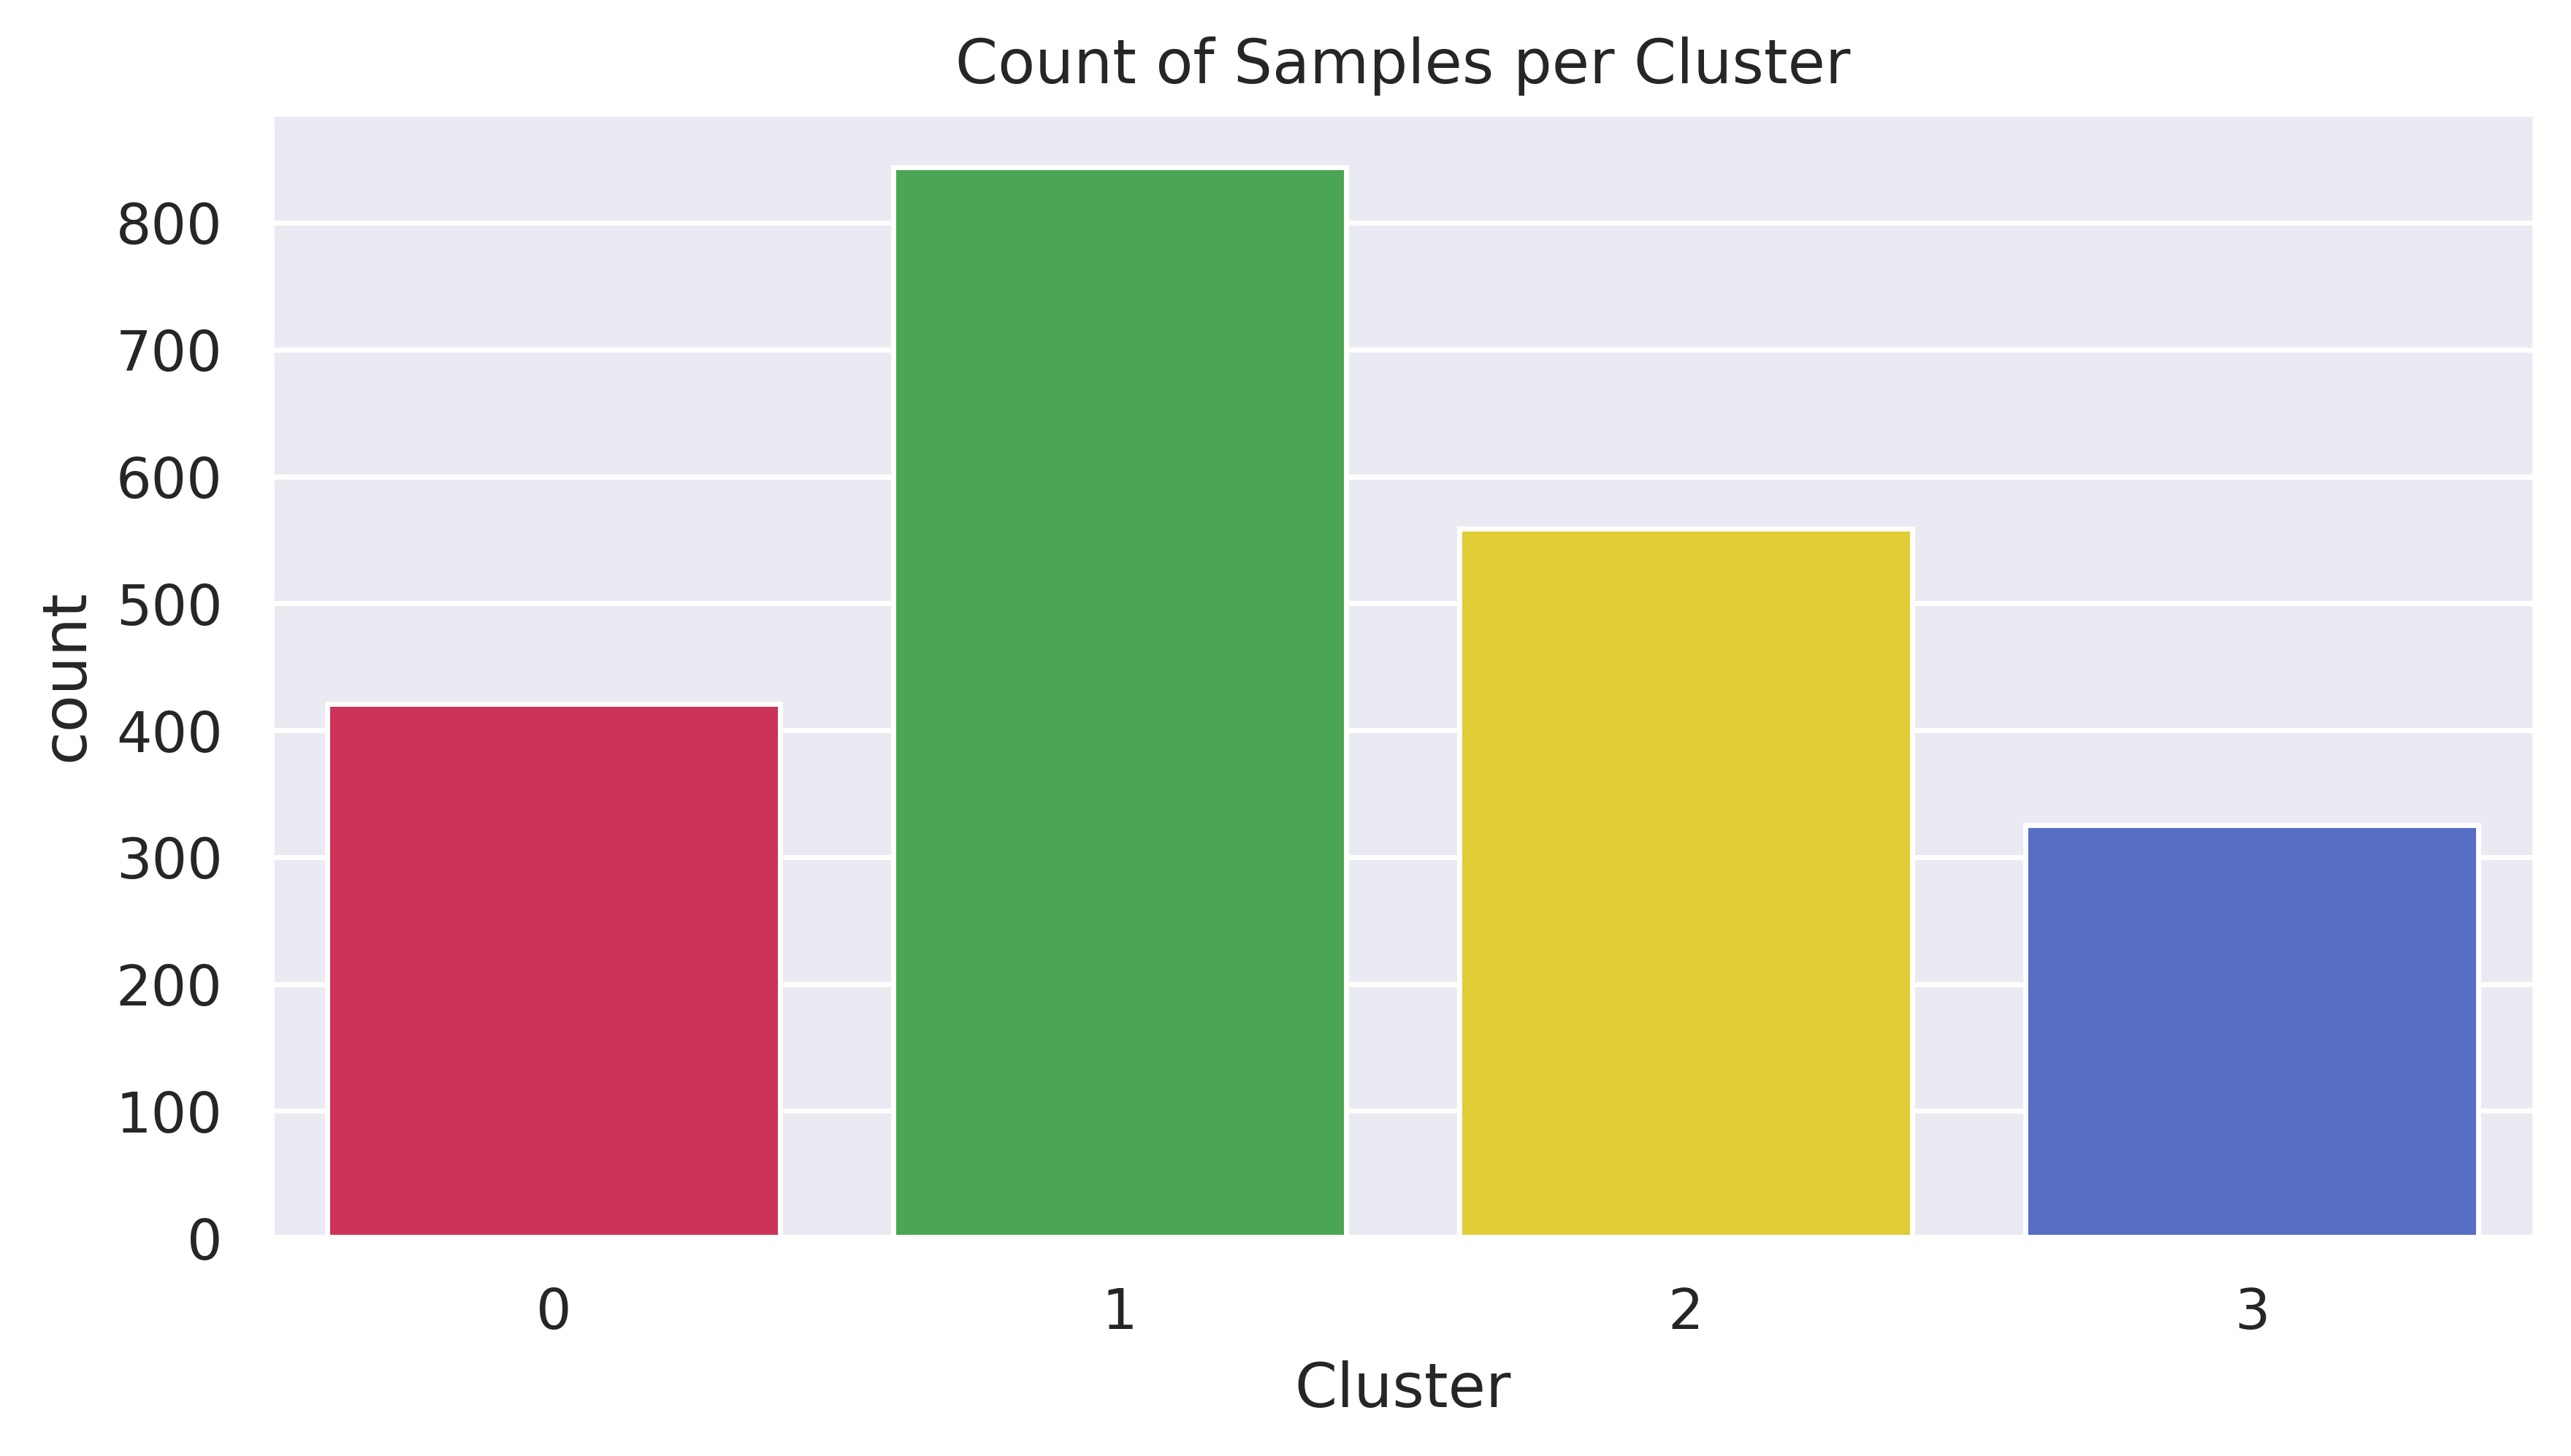

In [ ]:
# write code below

from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns;

AC_n4 = AgglomerativeClustering(n_clusters=4)

clusters = data.copy()

clustered_data = AC_n4.fit_predict(clusters)

clusters.insert(0, "Cluster", clustered_data)

def visualize_cluster(df, cluster):
    palette = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']

    p = palette[:len(df[cluster].unique())]
    pl = sns.countplot(x=df[cluster], palette=p)
    pl.set_title("Count of Samples per {}".format(cluster))
    sns.set_theme(rc={"figure.figsize":(8, 4), "figure.dpi":500})
    # sns.set(rc={"figure.figsize":(8, 4)})
    plt.show()

visualize_cluster(clusters, 'Cluster')

## Step 4: Reduce dimensionality to visualize cluster structure

High-dimensional data is difficult to reason about directly. Dimensionality reduction allows you to see structure more clearly.

### Plan
Create a plan to:
- apply PCA to reduce the feature space to two components
- project shoppers into this reduced space
- visualize clusters in two dimensions

### Validate
- fit PCA only on feature data (not labels)
- produce a 2D representation suitable for plotting
- use cluster labels to color or differentiate points

### Execute
Implement PCA and create a scatter plot of the two components.

### Check
- Generate a scatter plot of the two PCA components colored by cluster.
- Confirm that the plot renders and that points are not all collapsed.

In [ ]:
def plot_clusters(df, cluster, x, y):
    palette = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']
    p = palette[:len(df[cluster].unique())]
    #pl = sns.scatterplot(data=df, x=df[x], y=df[y], hue=df[cluster], palette=p, size=df[cluster], sizes=(10, 100), legend="full")
    pl = sns.scatterplot(data=df, x=df[x], y=df[y], hue=df[cluster], palette=p, legend="full")
    pl.set_title("{} Profile By {} (x) and {} (y)".format(cluster, x, y))
    sns.set_theme(rc={"figure.figsize":(8, 4), "figure.dpi":500})
    plt.legend()
    plt.show()

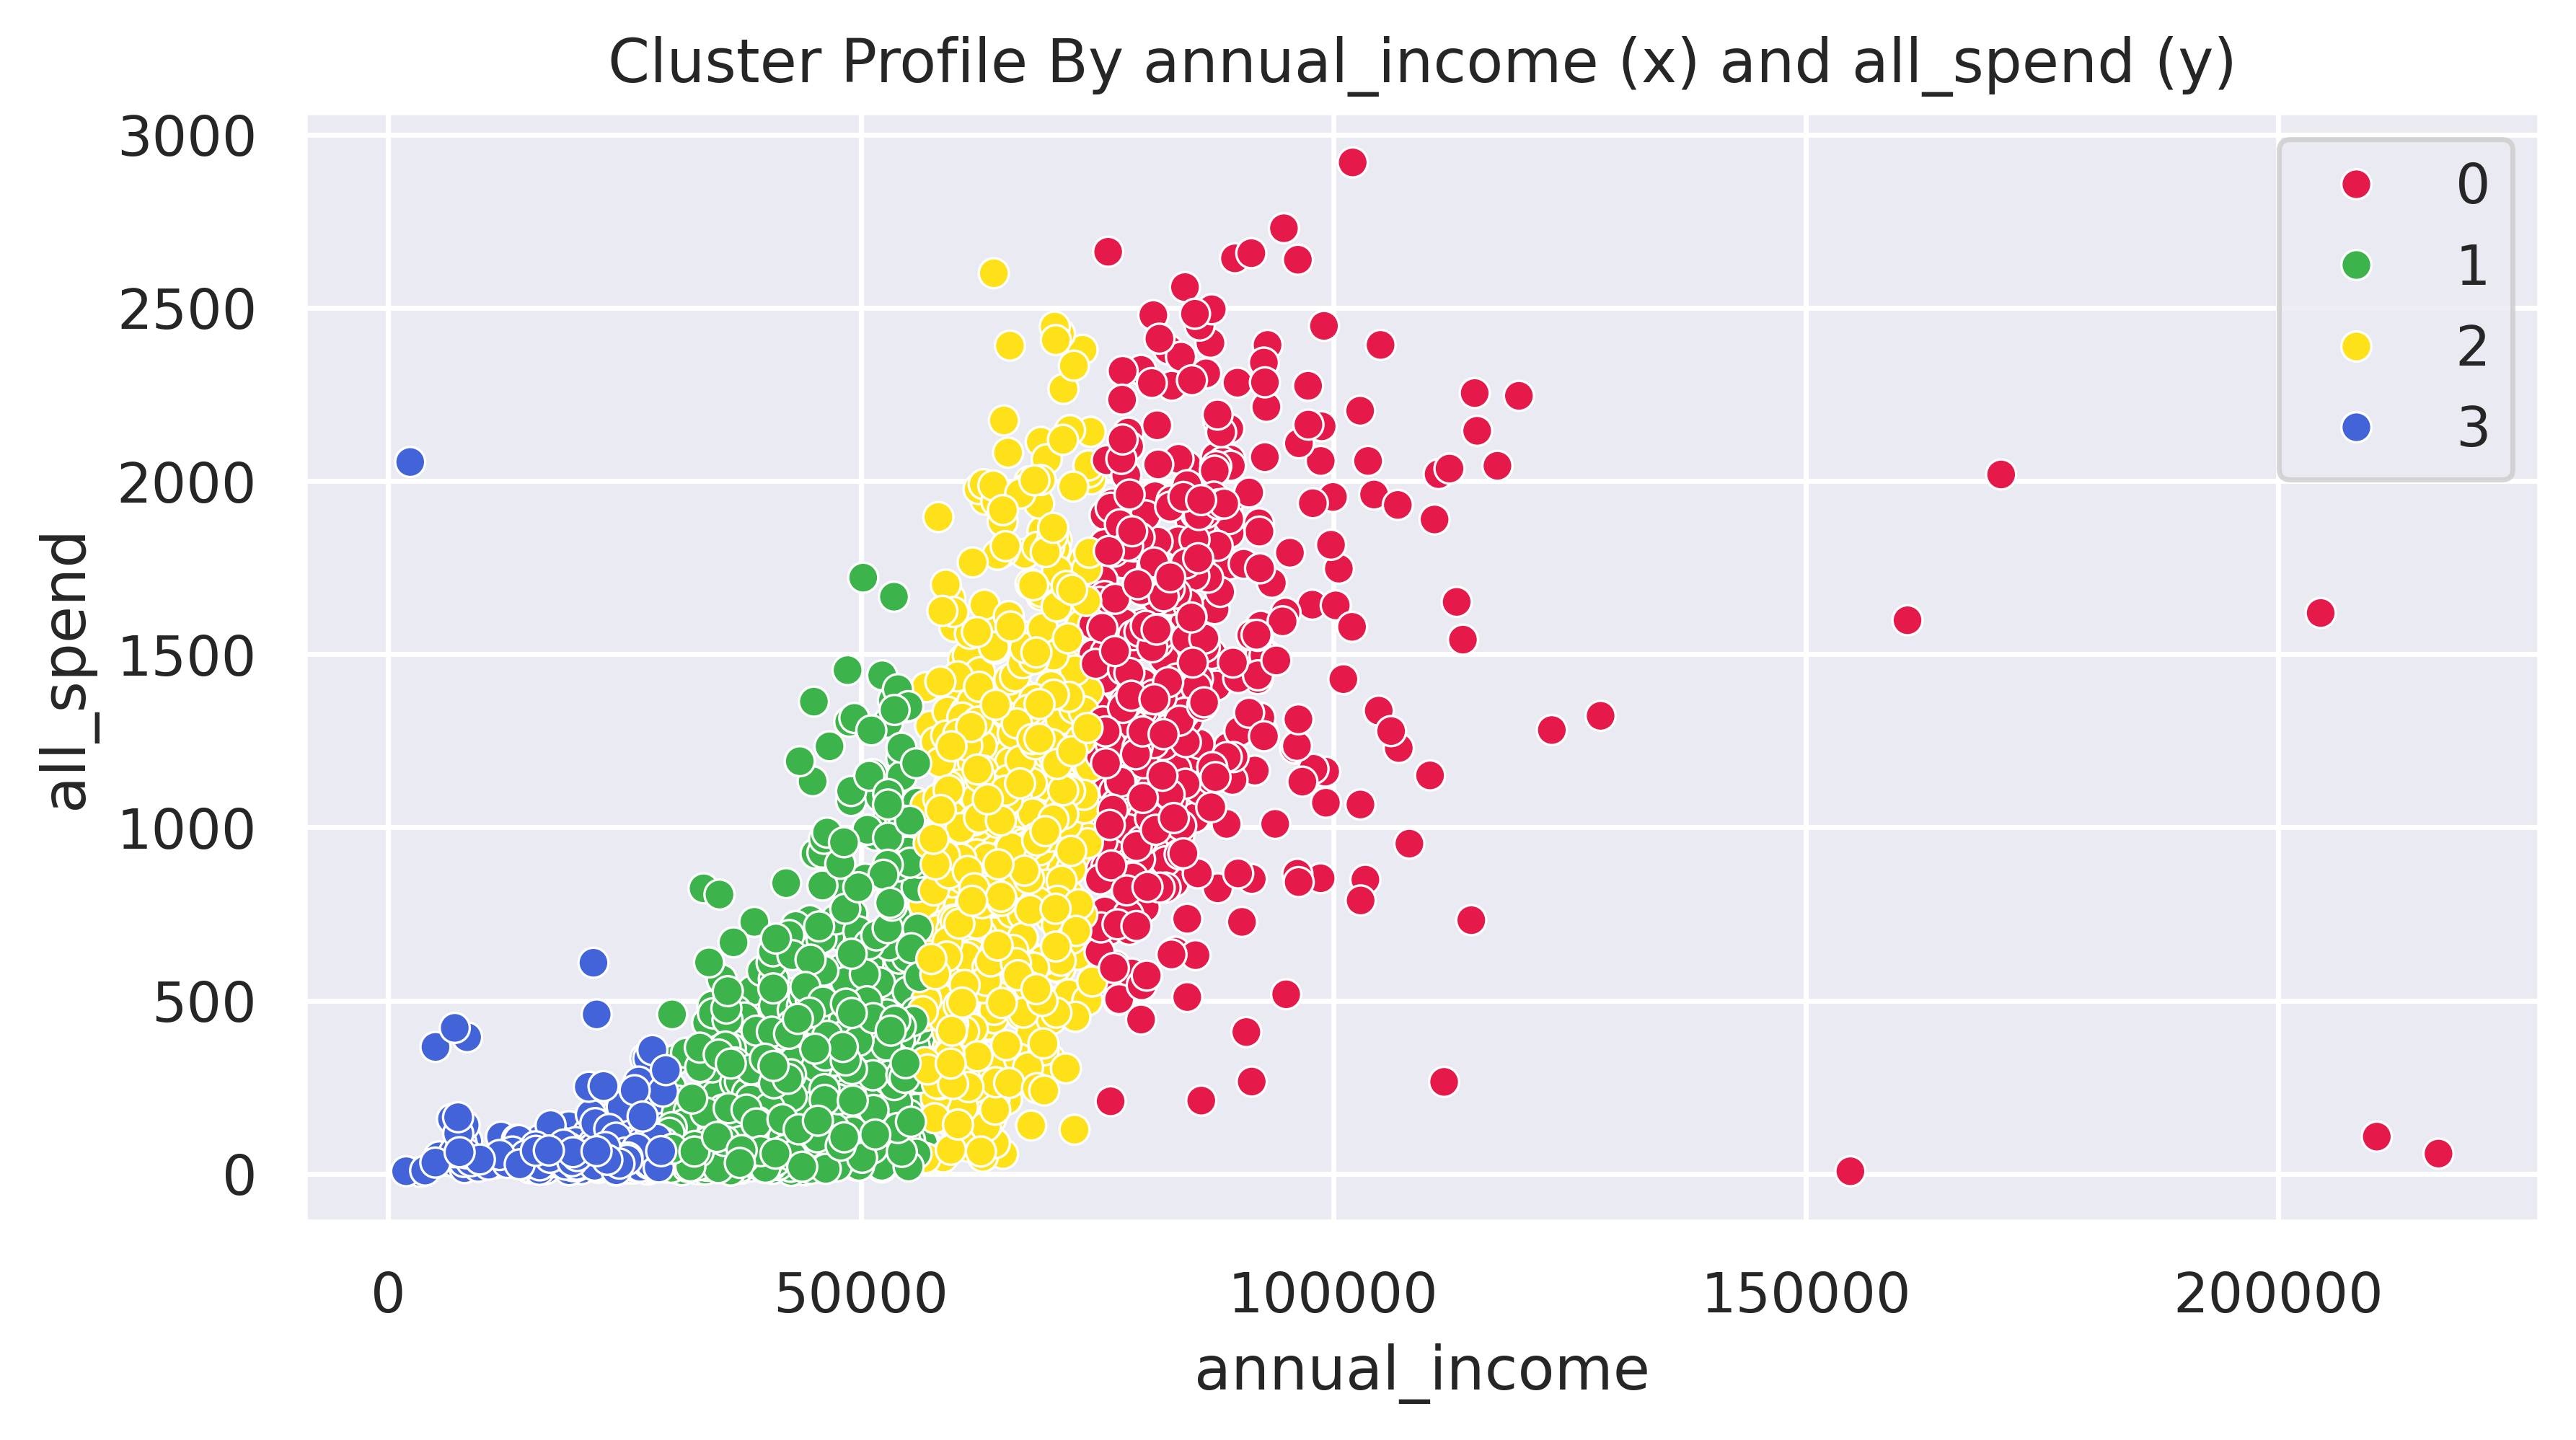

In [ ]:
# original clusters

# write code below

plot_clusters(clusters, 'Cluster', 'annual_income', 'all_spend')

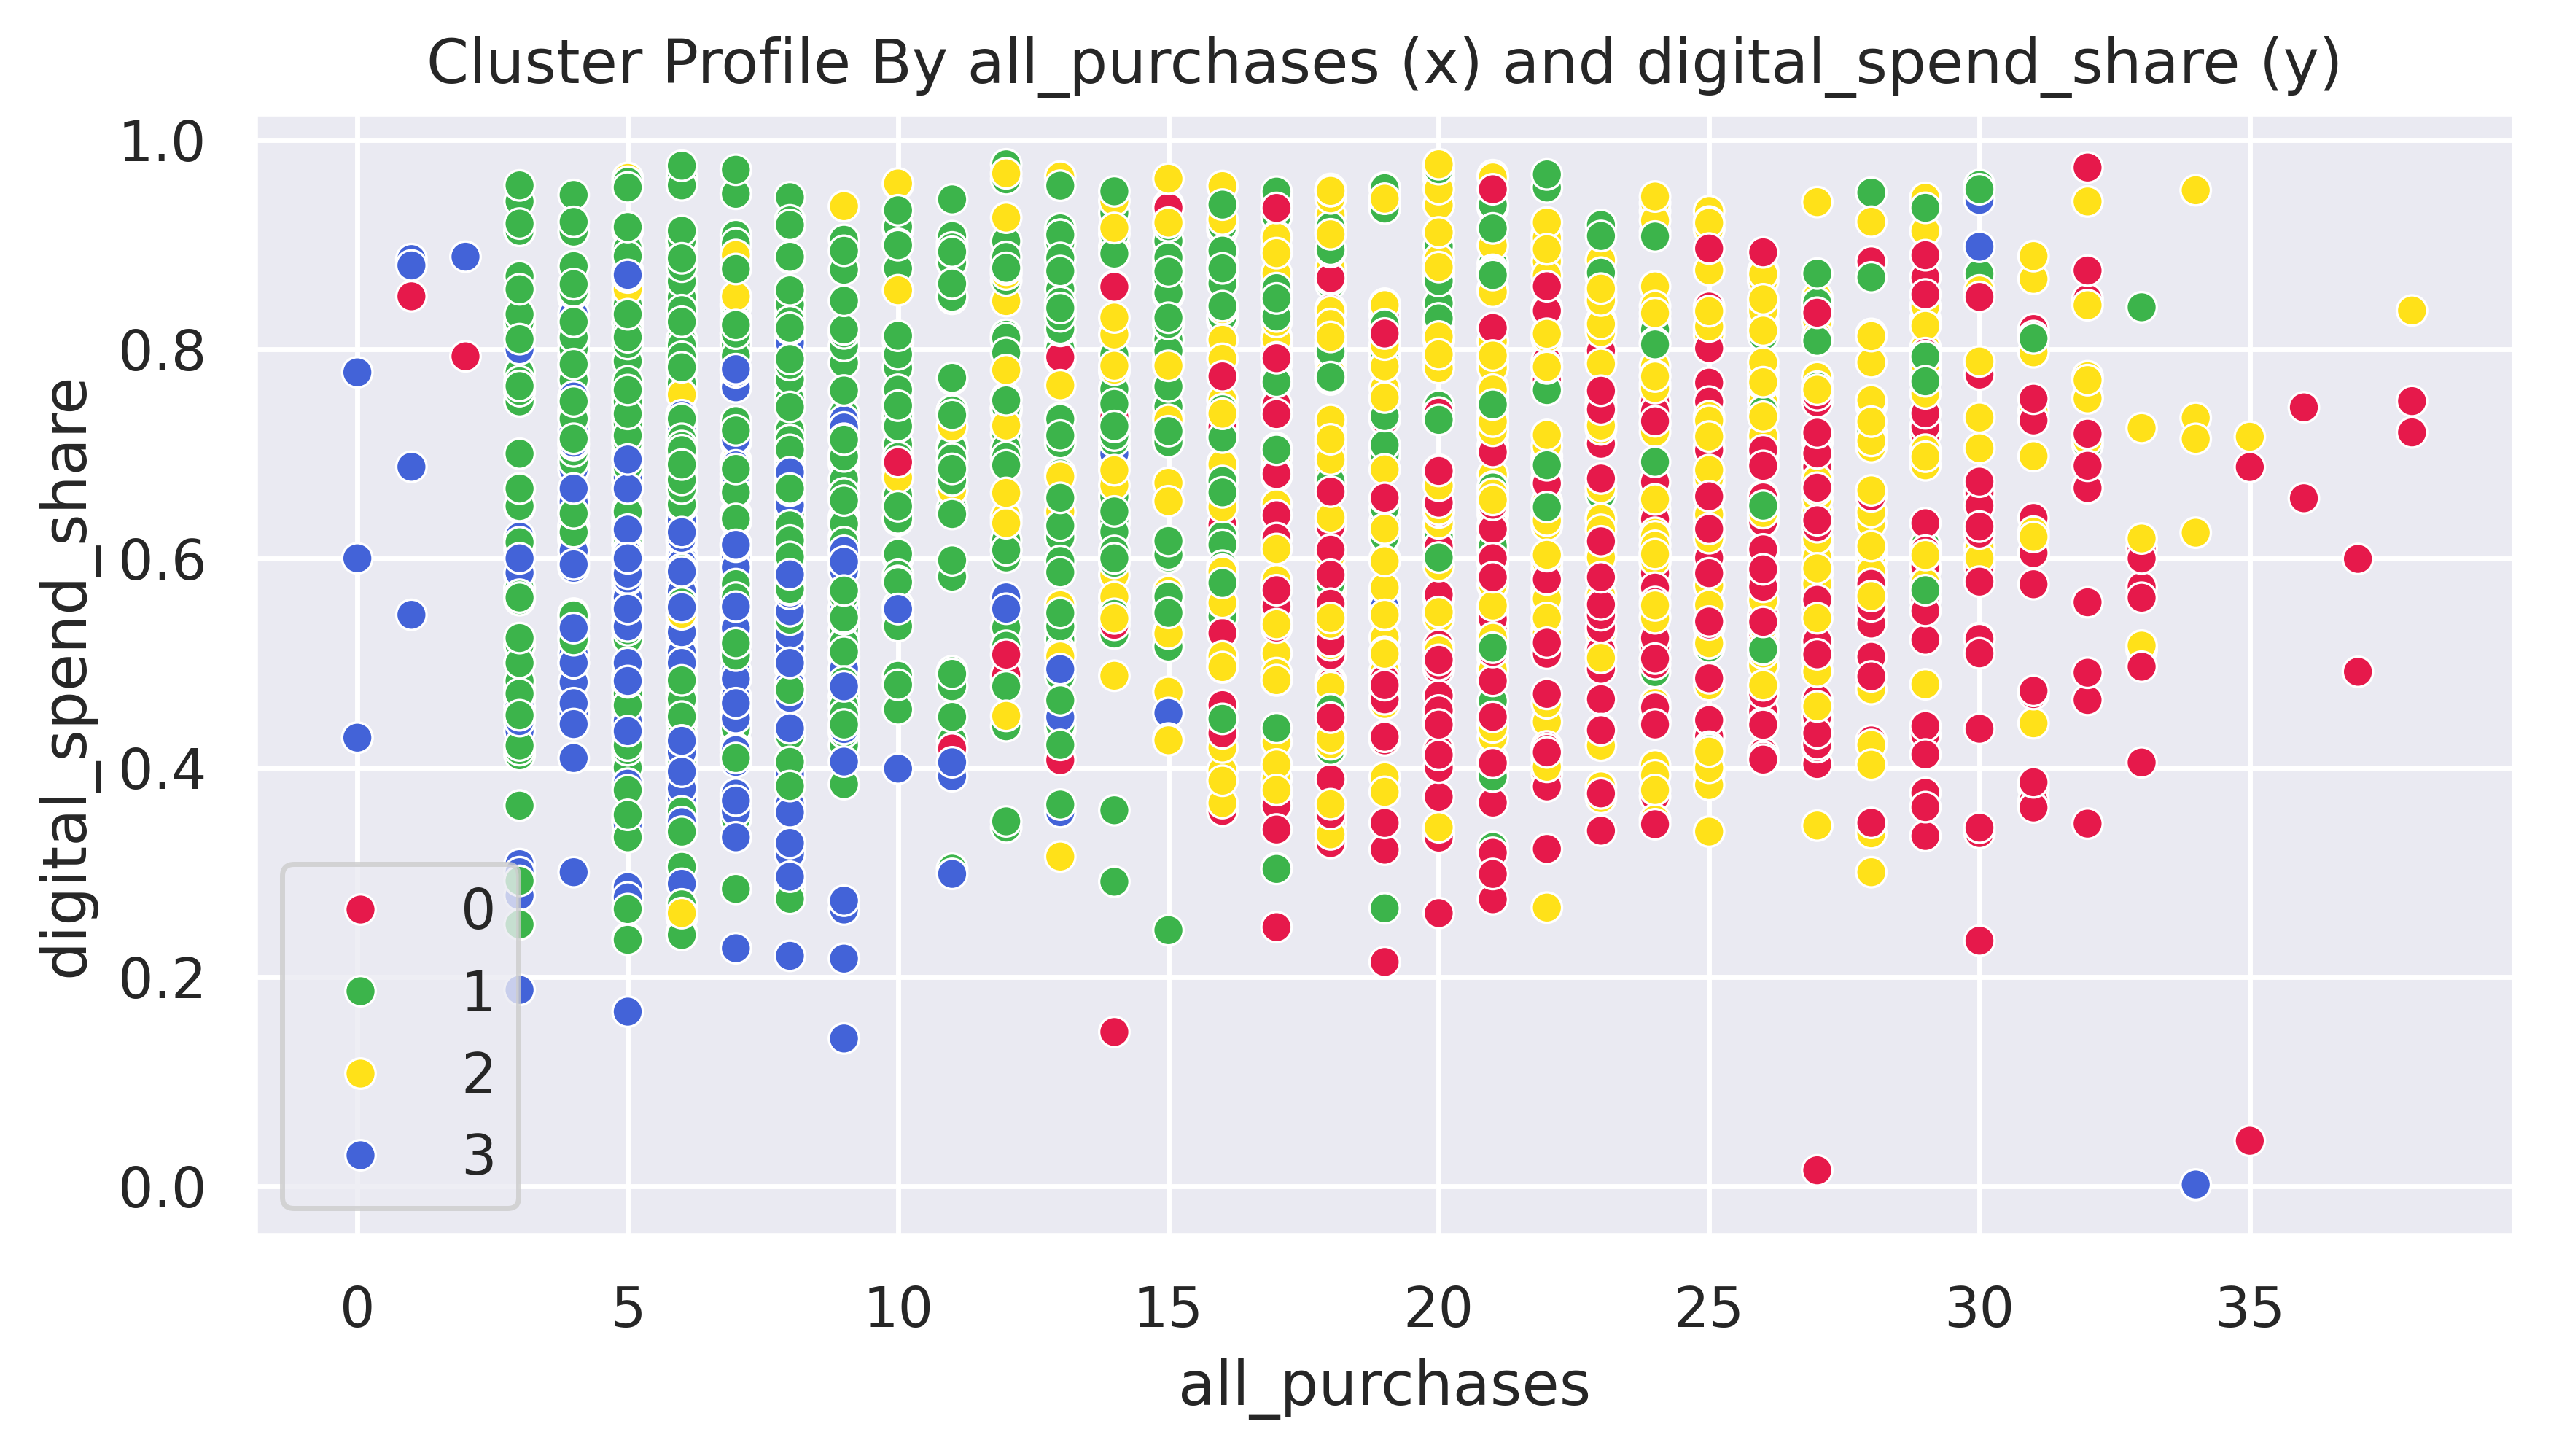

In [ ]:
# write code below

plot_clusters(clusters, 'Cluster', 'all_purchases', 'digital_spend_share')

In [ ]:
def get_cluster_detail(df, cluster):
    pd.set_option('display.max_columns', None)
    rows = []
    for i in sorted(df[cluster].unique()):
        troika = [i]
        print(f'Summary for {cluster} #{str(i)}')
        filtered_df = df[df[cluster] == i]
        troika.append(round(filtered_df.loc[:, 'all_spend'].mean(),2))
        troika.append(round(filtered_df.loc[:, 'all_spend'].std(),2))
        display(filtered_df.describe())
        print('\n')
        rows.append(troika)
    sns.boxplot(data=df, x=cluster, y="all_spend")#, hue="LeftTheCompany")
    x_plot = 'Cluster'
    y_plot_b = "Std Dev Total Spend"
    y_plot_a = "Mean Total Spend"
    simple_summary_df = pd.DataFrame(rows, columns=[x_plot, y_plot_a, y_plot_b])
    display(simple_summary_df)
    def get_quotient(df,y1,y2):
        n = round(df.loc[:, y1].mean(),2)
        d = round(df.loc[:, y2].mean(),2)
        # print(n, d)
        # print(n/d)
        return round(n/d,2)
    fig, ax1 = plt.subplots()
    g = sns.barplot(data=simple_summary_df, x=x_plot, y=y_plot_a, ax=ax1, hue=x_plot)
    ax1.set_ylabel(y_plot_a)
    ax2 = ax1.twinx()
    ax2.set_ylim(ax1.get_ylim())
    ax2.set_yticklabels(np.round(ax1.get_yticks()/get_quotient(simple_summary_df, y_plot_a, y_plot_b),1))
    ax2.set_ylabel(y_plot_b)
    plt.show()

Clustered data in 0.13164162635803223s


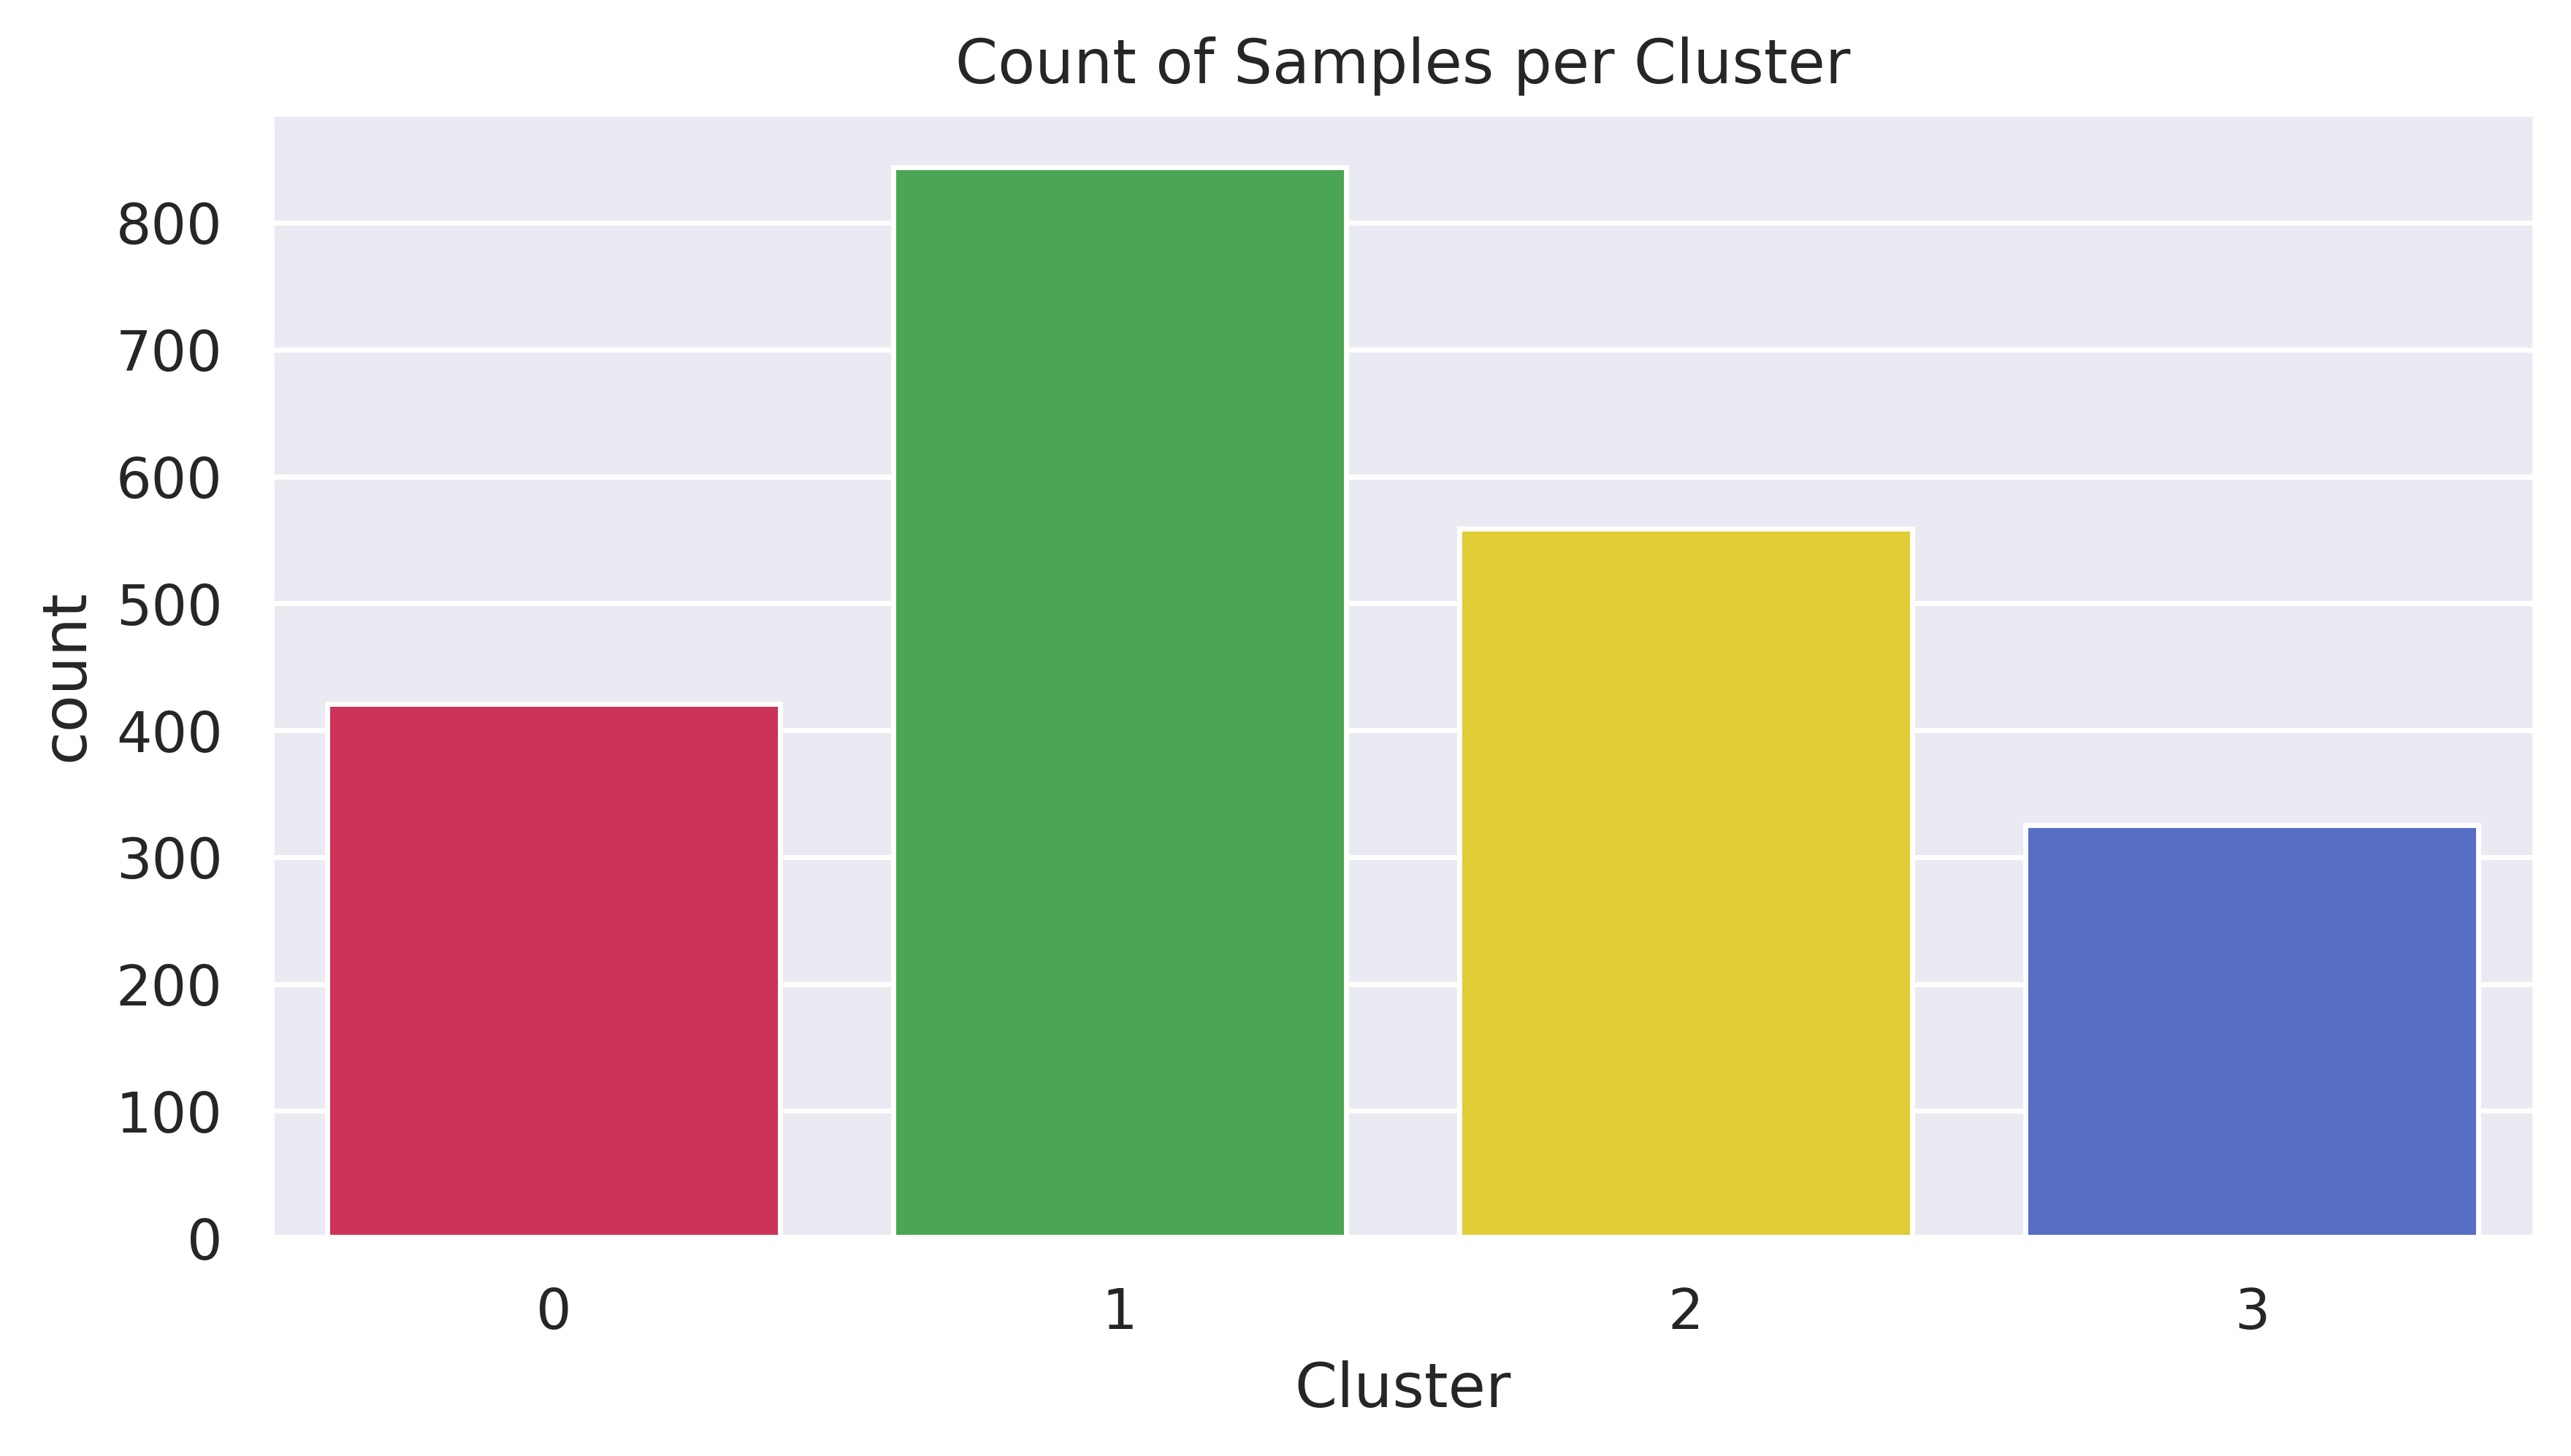

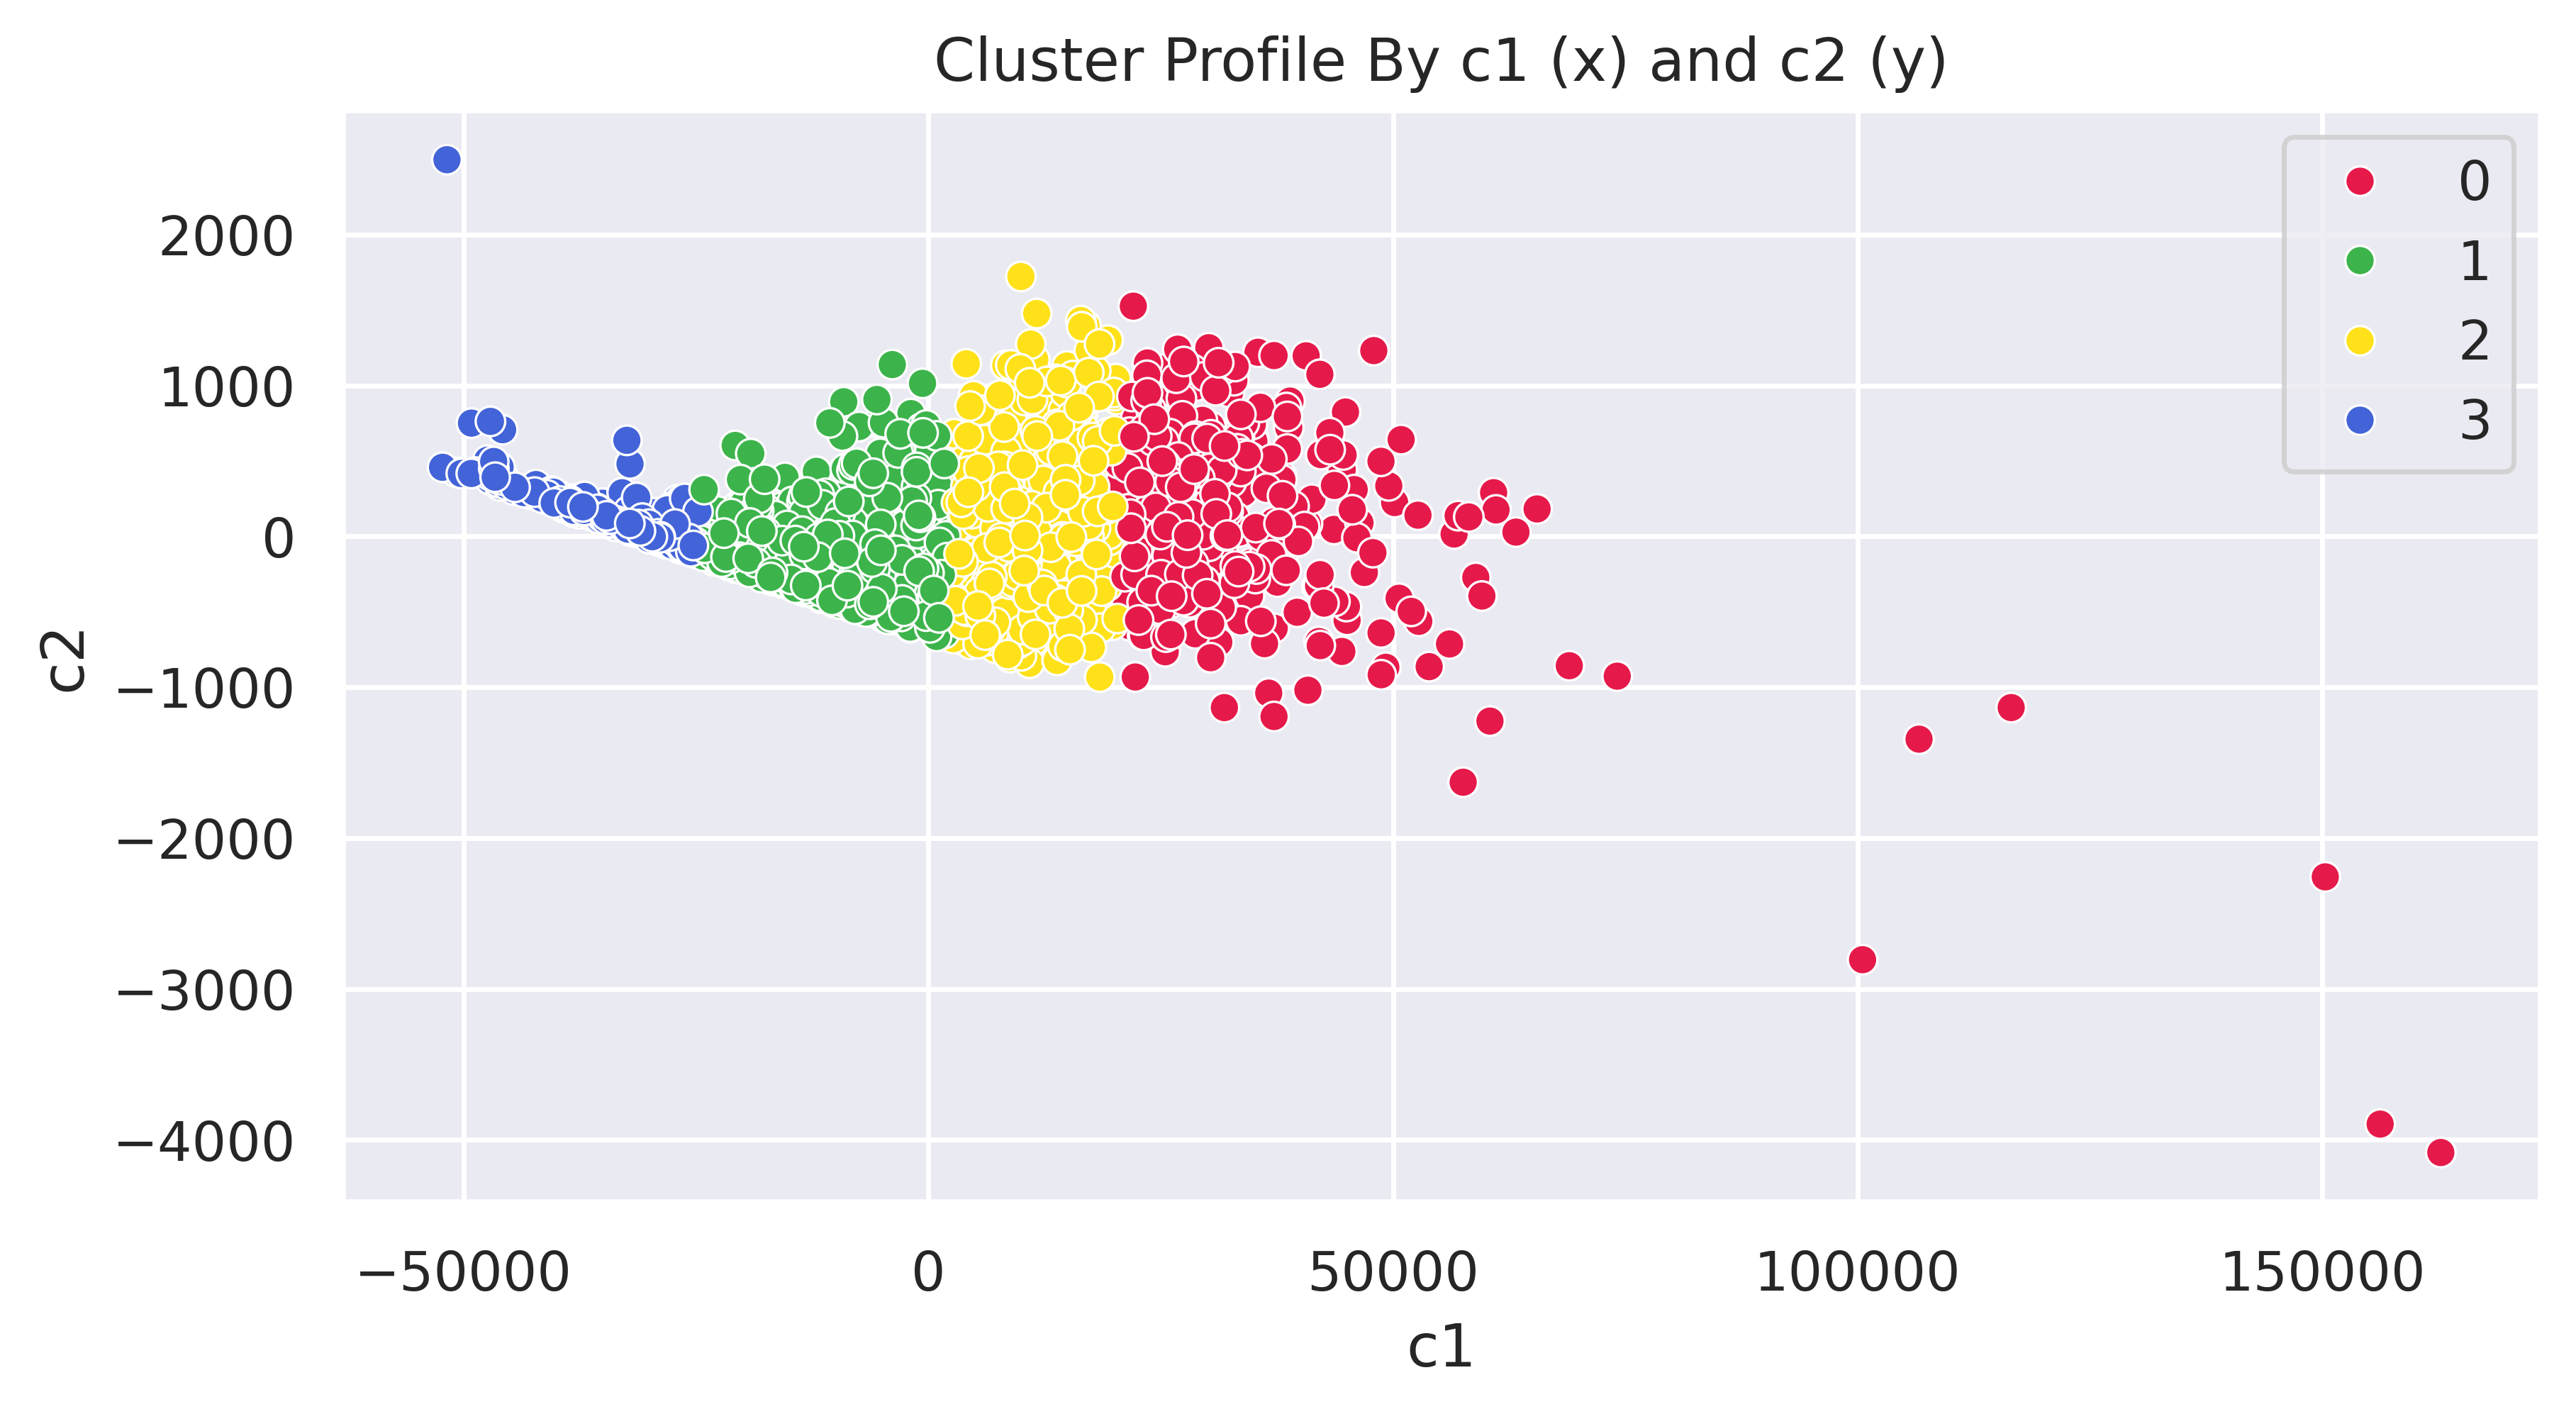

Summary for Cluster #0


Cluster             c1           c2    all_spend  all_purchases
count    421.0     421.000000   421.000000   421.000000     421.000000
mean       0.0   32482.468450   102.980971  1462.346793      23.344418
std        0.0   15387.997063   606.808904   512.164965       5.450439
min        0.0   20480.617096 -4084.401300     7.000000       0.000000
25%        0.0   24268.751242  -213.401546  1123.000000      20.000000
50%        0.0   28868.943653   130.653965  1455.000000      23.000000
75%        0.0   34893.990157   497.180417  1831.000000      27.000000
max        0.0  162750.542818  1525.551786  2920.000000      38.000000



Summary for Cluster #1


Cluster            c1           c2    all_spend  all_purchases
count    844.0    844.000000   844.000000   844.000000     844.000000
mean       1.0 -11163.477698  -149.412268   277.991706      10.829384
std        0.0   7533.126066   264.330962   304.144856       6.309479
min        1.0 -24422.187650  -664.002924     8.000000       3.000000
25%        1.0 -17524.510725  -315.506771    59.000000       6.000000
50%        1.0 -11505.411453  -187.422455   150.500000       9.000000
75%        1.0  -4850.214705   -55.129027   400.250000      15.000000
max        1.0   2411.759966  1138.298584  1721.000000      33.000000



Summary for Cluster #2


Cluster            c1           c2    all_spend  all_purchases
count    559.0    559.000000   559.000000   559.000000     559.000000
mean       2.0  11318.107747    85.574056   992.969589      21.019678
std        0.0   5090.546689   476.752548   508.097284       5.952437
min        2.0   2401.902888  -933.000498    45.000000       5.000000
25%        2.0   6770.112623  -259.997309   618.500000      17.000000
50%        2.0  11177.506192    55.496736   976.000000      21.000000
75%        2.0  15799.173905   385.262373  1307.000000      25.000000
max        2.0  20330.650275  1721.867667  2600.000000      38.000000



Summary for Cluster #3


Cluster            c1           c2   all_spend  all_purchases
count    325.0    325.000000   325.000000   325.00000     325.000000
mean       3.0 -32553.742373   107.424825    78.00000       6.403077
std        0.0   6223.721219   200.552434   132.36274       3.366592
min        3.0 -52267.498996  -118.163887     5.00000       0.000000
25%        3.0 -35468.812100   -14.744089    34.00000       5.000000
50%        3.0 -31365.048306    83.358441    52.00000       6.000000
75%        3.0 -27543.304285   171.401055    78.00000       8.000000
max        3.0 -24583.766083  2496.018705  2055.00000      34.000000

Cluster  Mean Total Spend  Std Dev Total Spend
0        0           1462.35               512.16
1        1            277.99               304.14
2        2            992.97               508.10
3        3             78.00               132.36

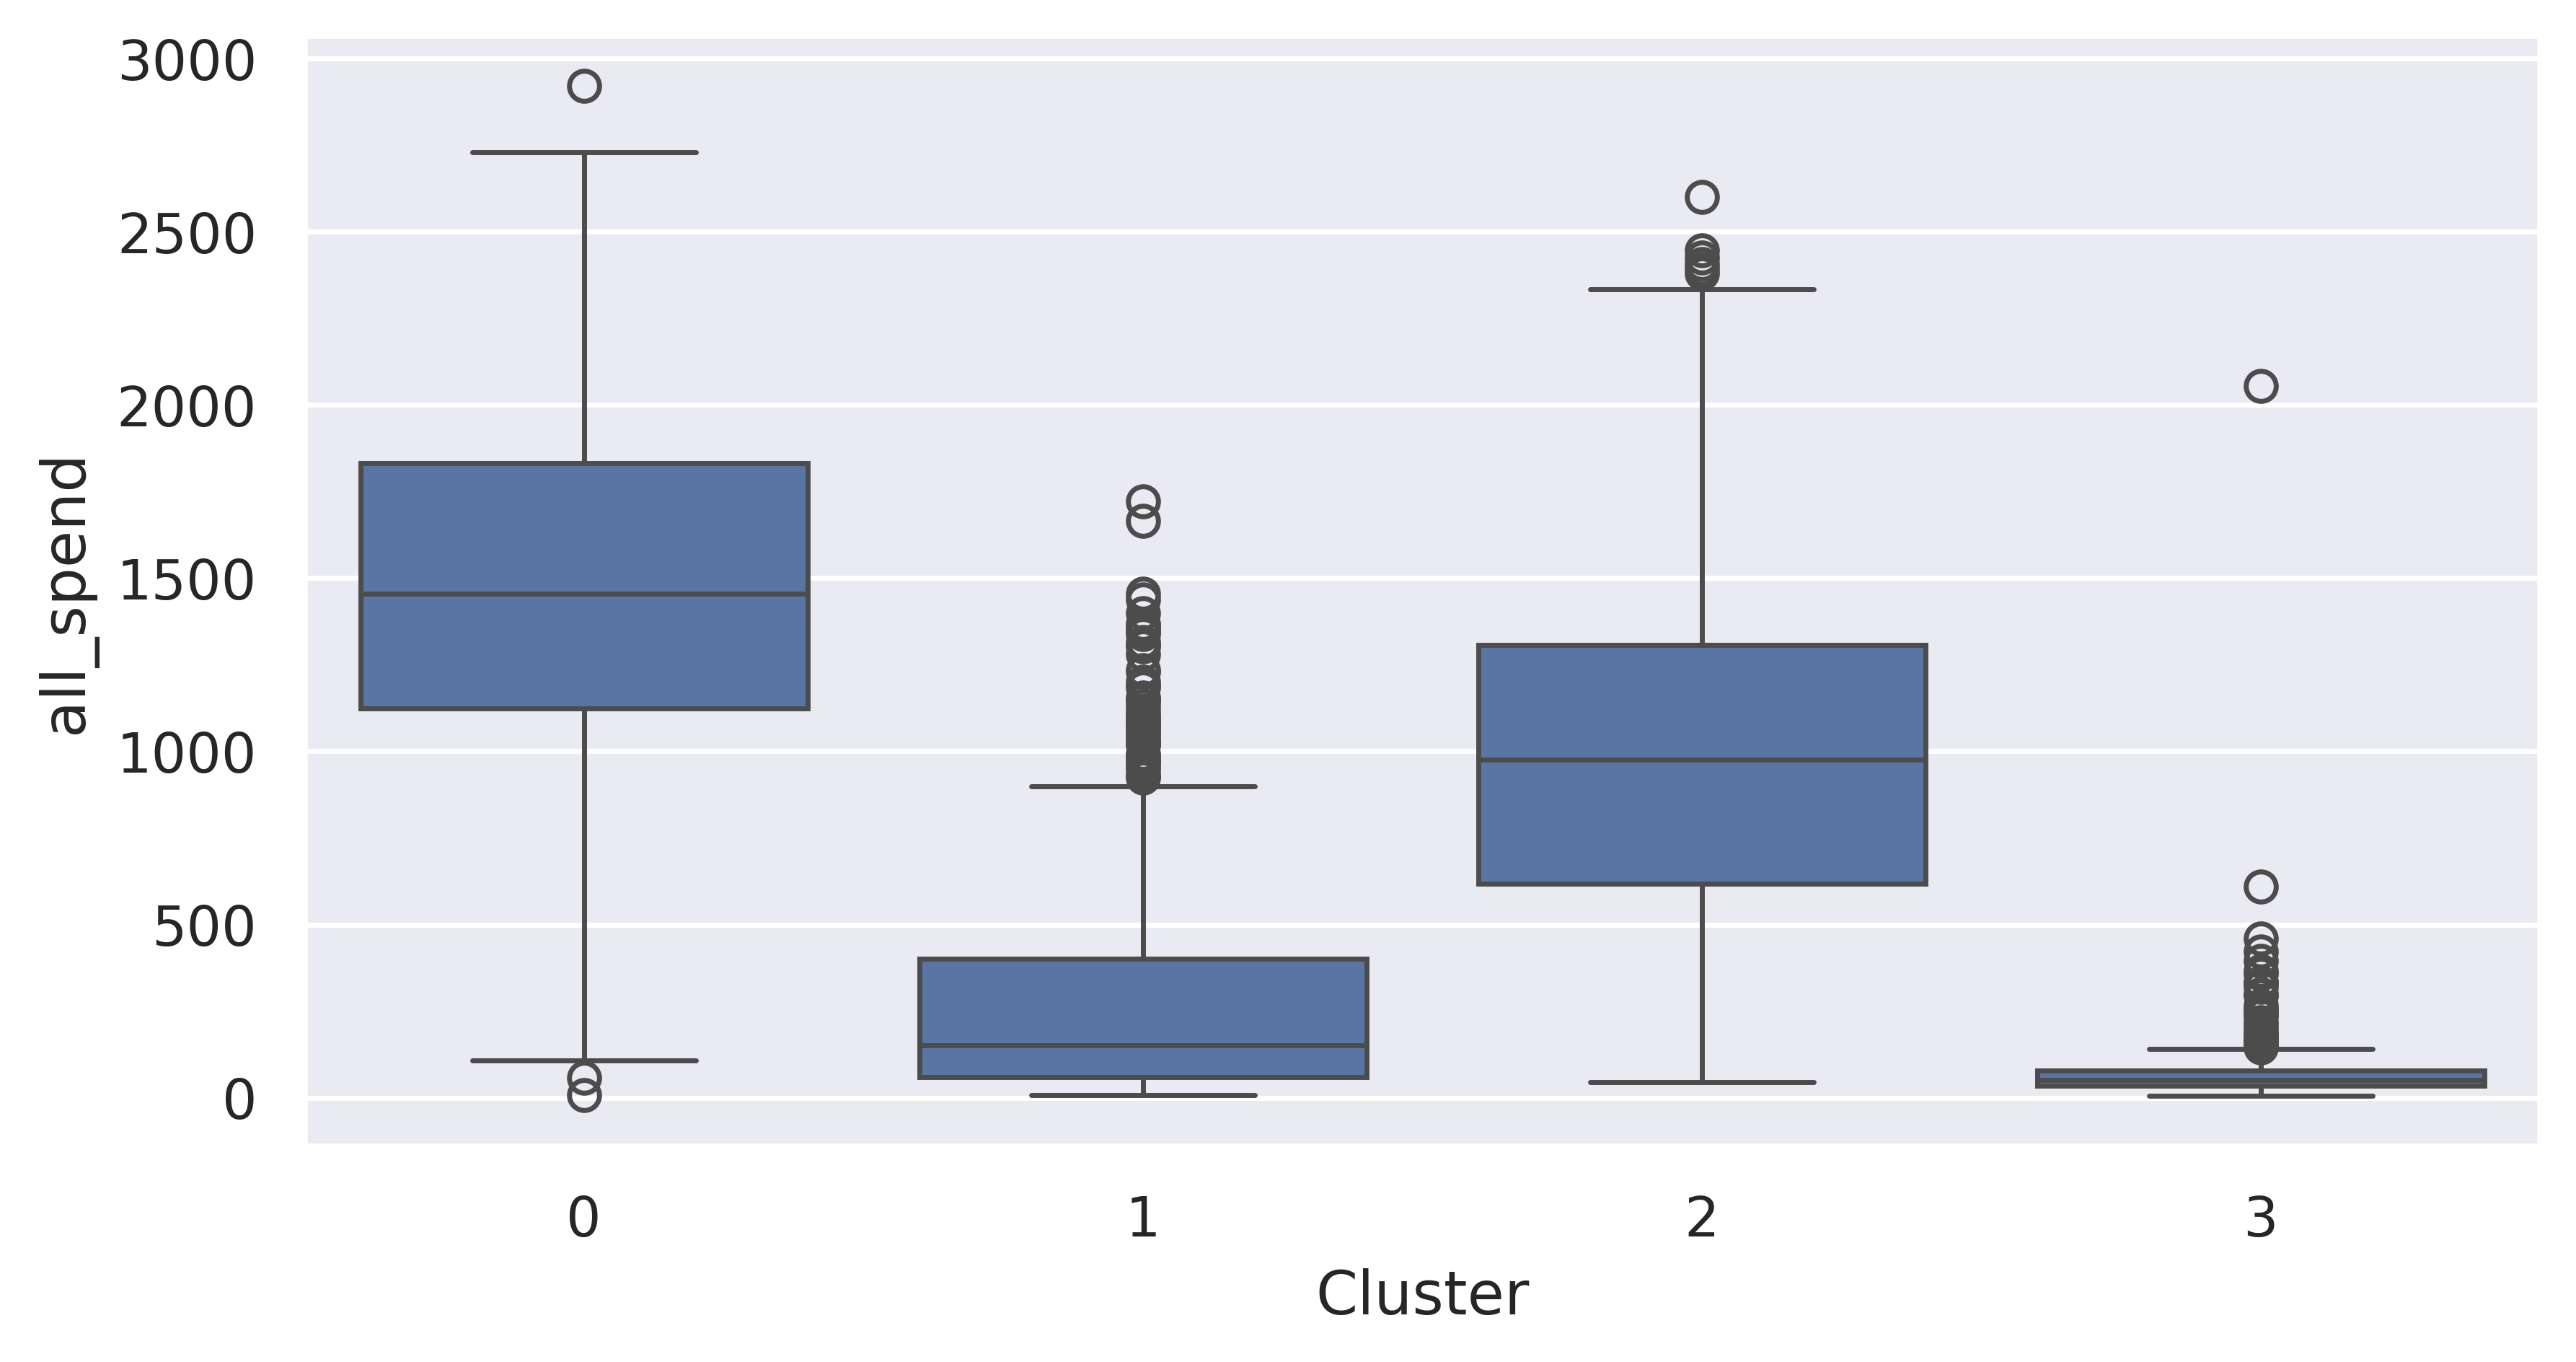

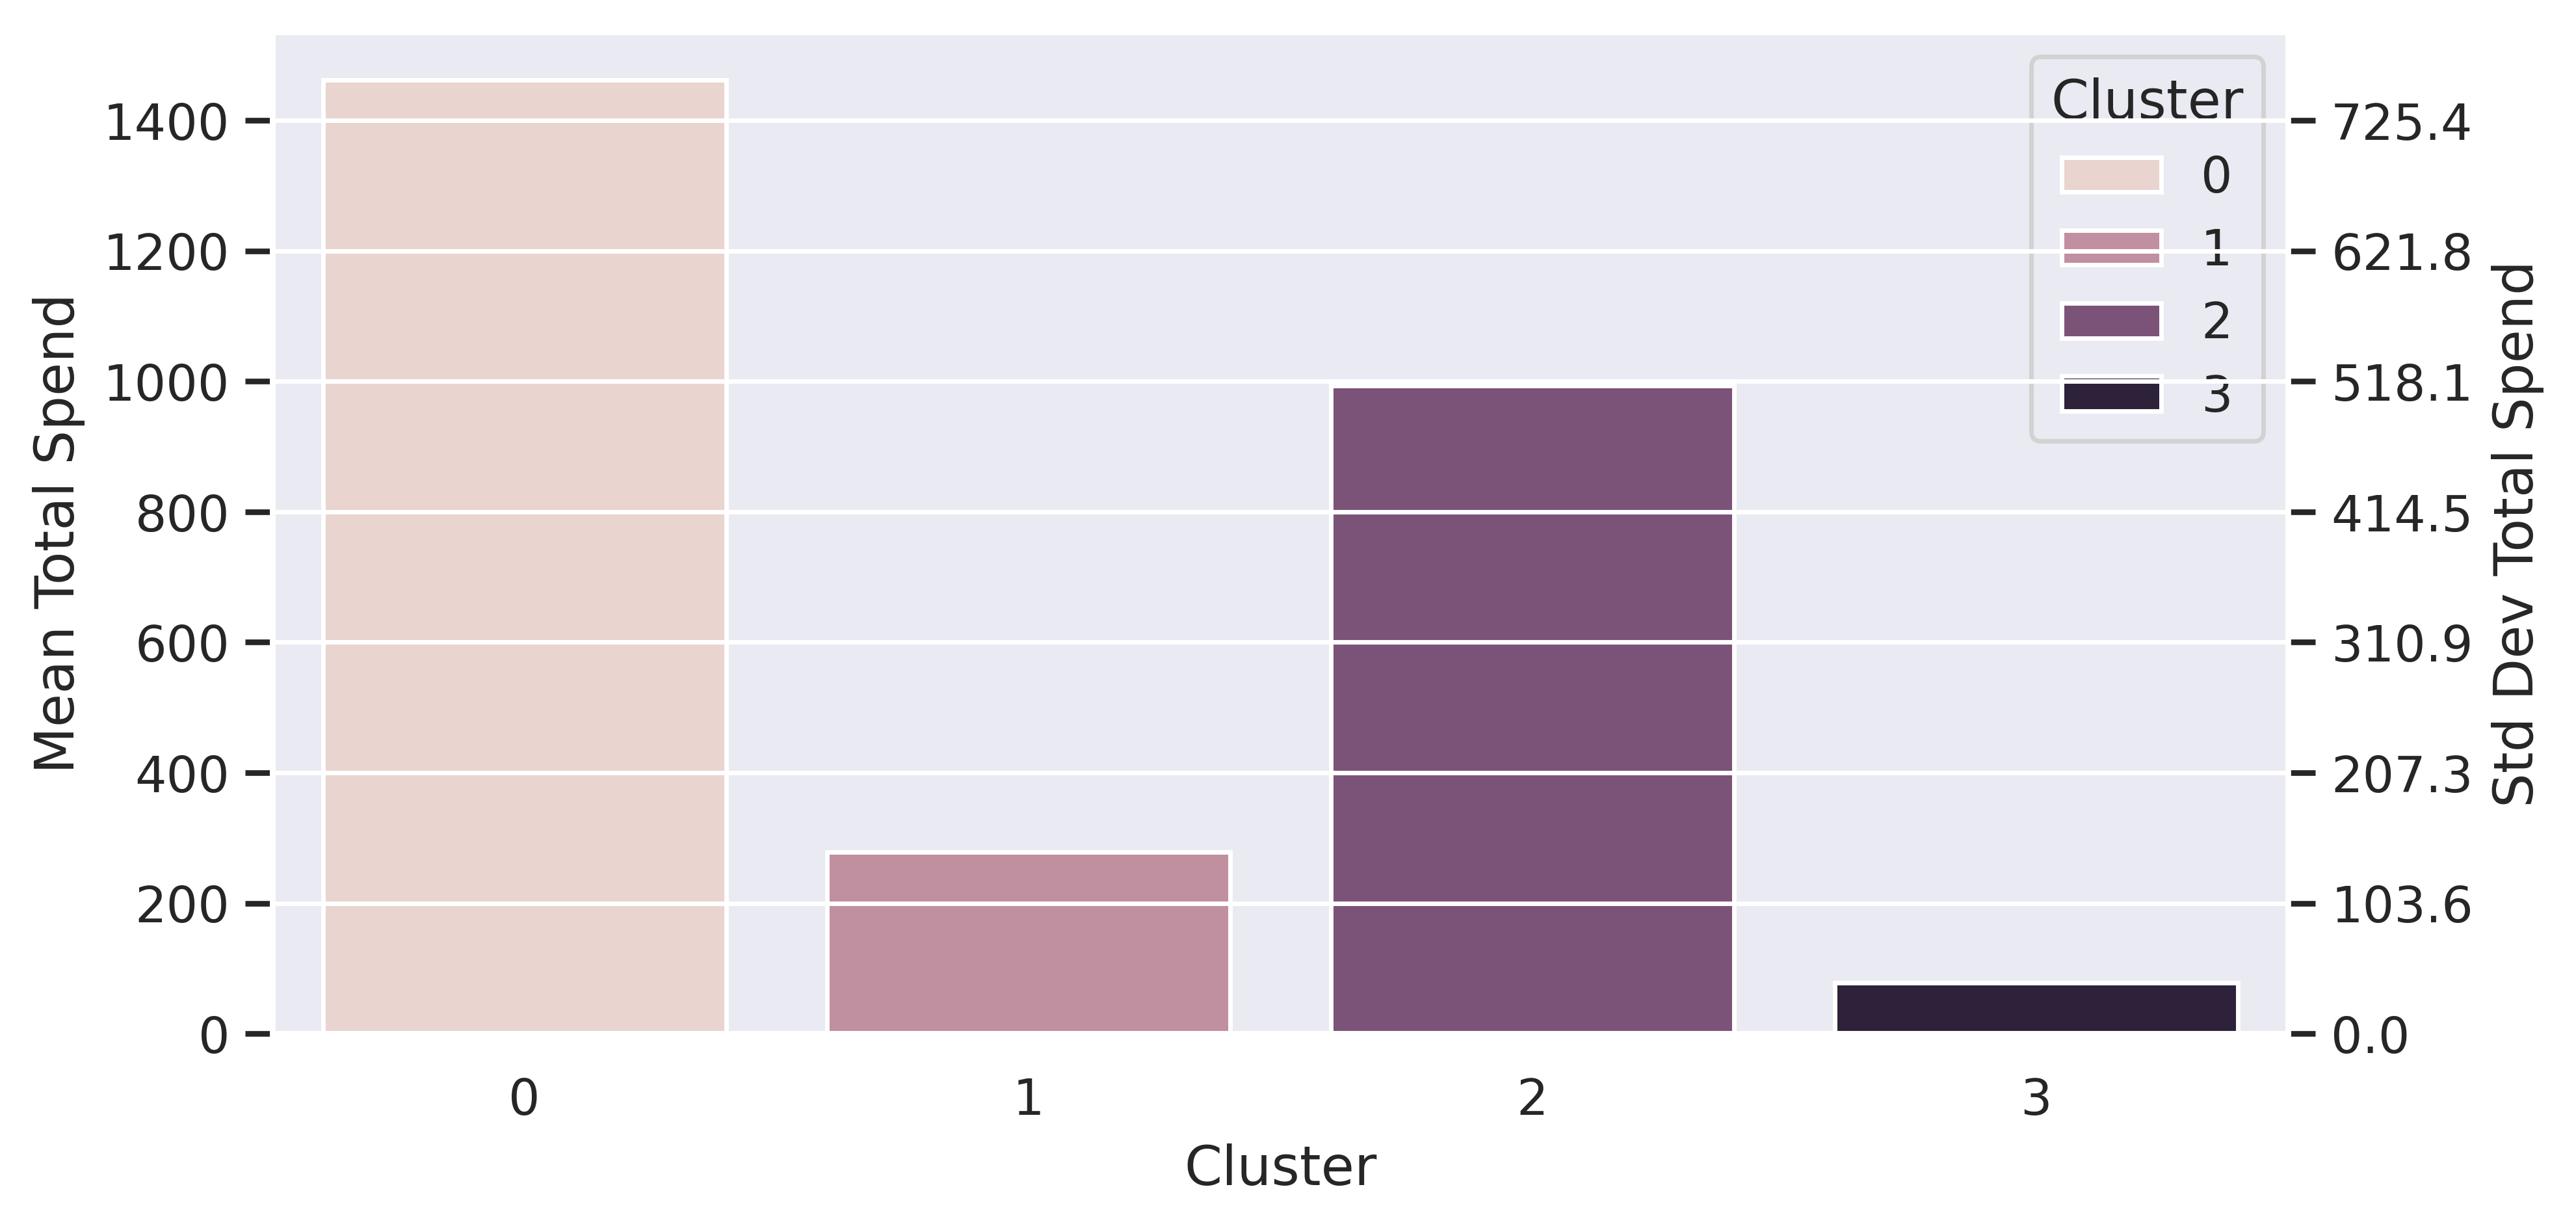

In [ ]:
# write code below

from util.get_pca_clusters import get_pca_clusters
from sklearn.decomposition import PCA

pca_components = 2

pca_object = PCA(n_components=pca_components)

pca_object.fit(data)

pca_data = pd.DataFrame(pca_object.transform(data), columns = (['c'+str(x) for x in range(1,pca_components+1)]))

pca_data.head()

pca_clusters = get_pca_clusters(pca_data, AC_n4, data)
visualize_cluster(pca_clusters, 'Cluster')
plot_clusters(pca_clusters, 'Cluster', 'c1', 'c2')
get_cluster_detail(pca_clusters, 'Cluster')

## Step 5: Select and justify a cluster count

The number of clusters is a modeling choice that affects how granular your segmentation becomes.

### Plan
Create a plan to:
- compute a clustering quality metric (e.g., inertia) across multiple values of k
- visualize how that metric changes as k increases
- select a reasonable k to proceed with

### Validate
- compare multiple values of k rather than a single guess
- treat cluster selection as judgment-based
- re-run clustering using the selected k

### Execute
Compute the metric across k and plot the results.

### Check
- Produce a plot showing the metric versus k.
- Re-run clustering with the chosen k and confirm labels update.

In [ ]:
from sklearn.cluster import KMeans

def compare_cluster_ks(df):
    inertia = []
    for k in range(2, 10):
        kmeans = KMeans(n_clusters=k, n_init='auto')
        kmeans.fit(df)
        inertia.append(kmeans.inertia_)

    plt.plot(range(2, 10), inertia)
    plt.grid(True)
    plt.title('KMeans Inertia by Number of Clusters (K)')

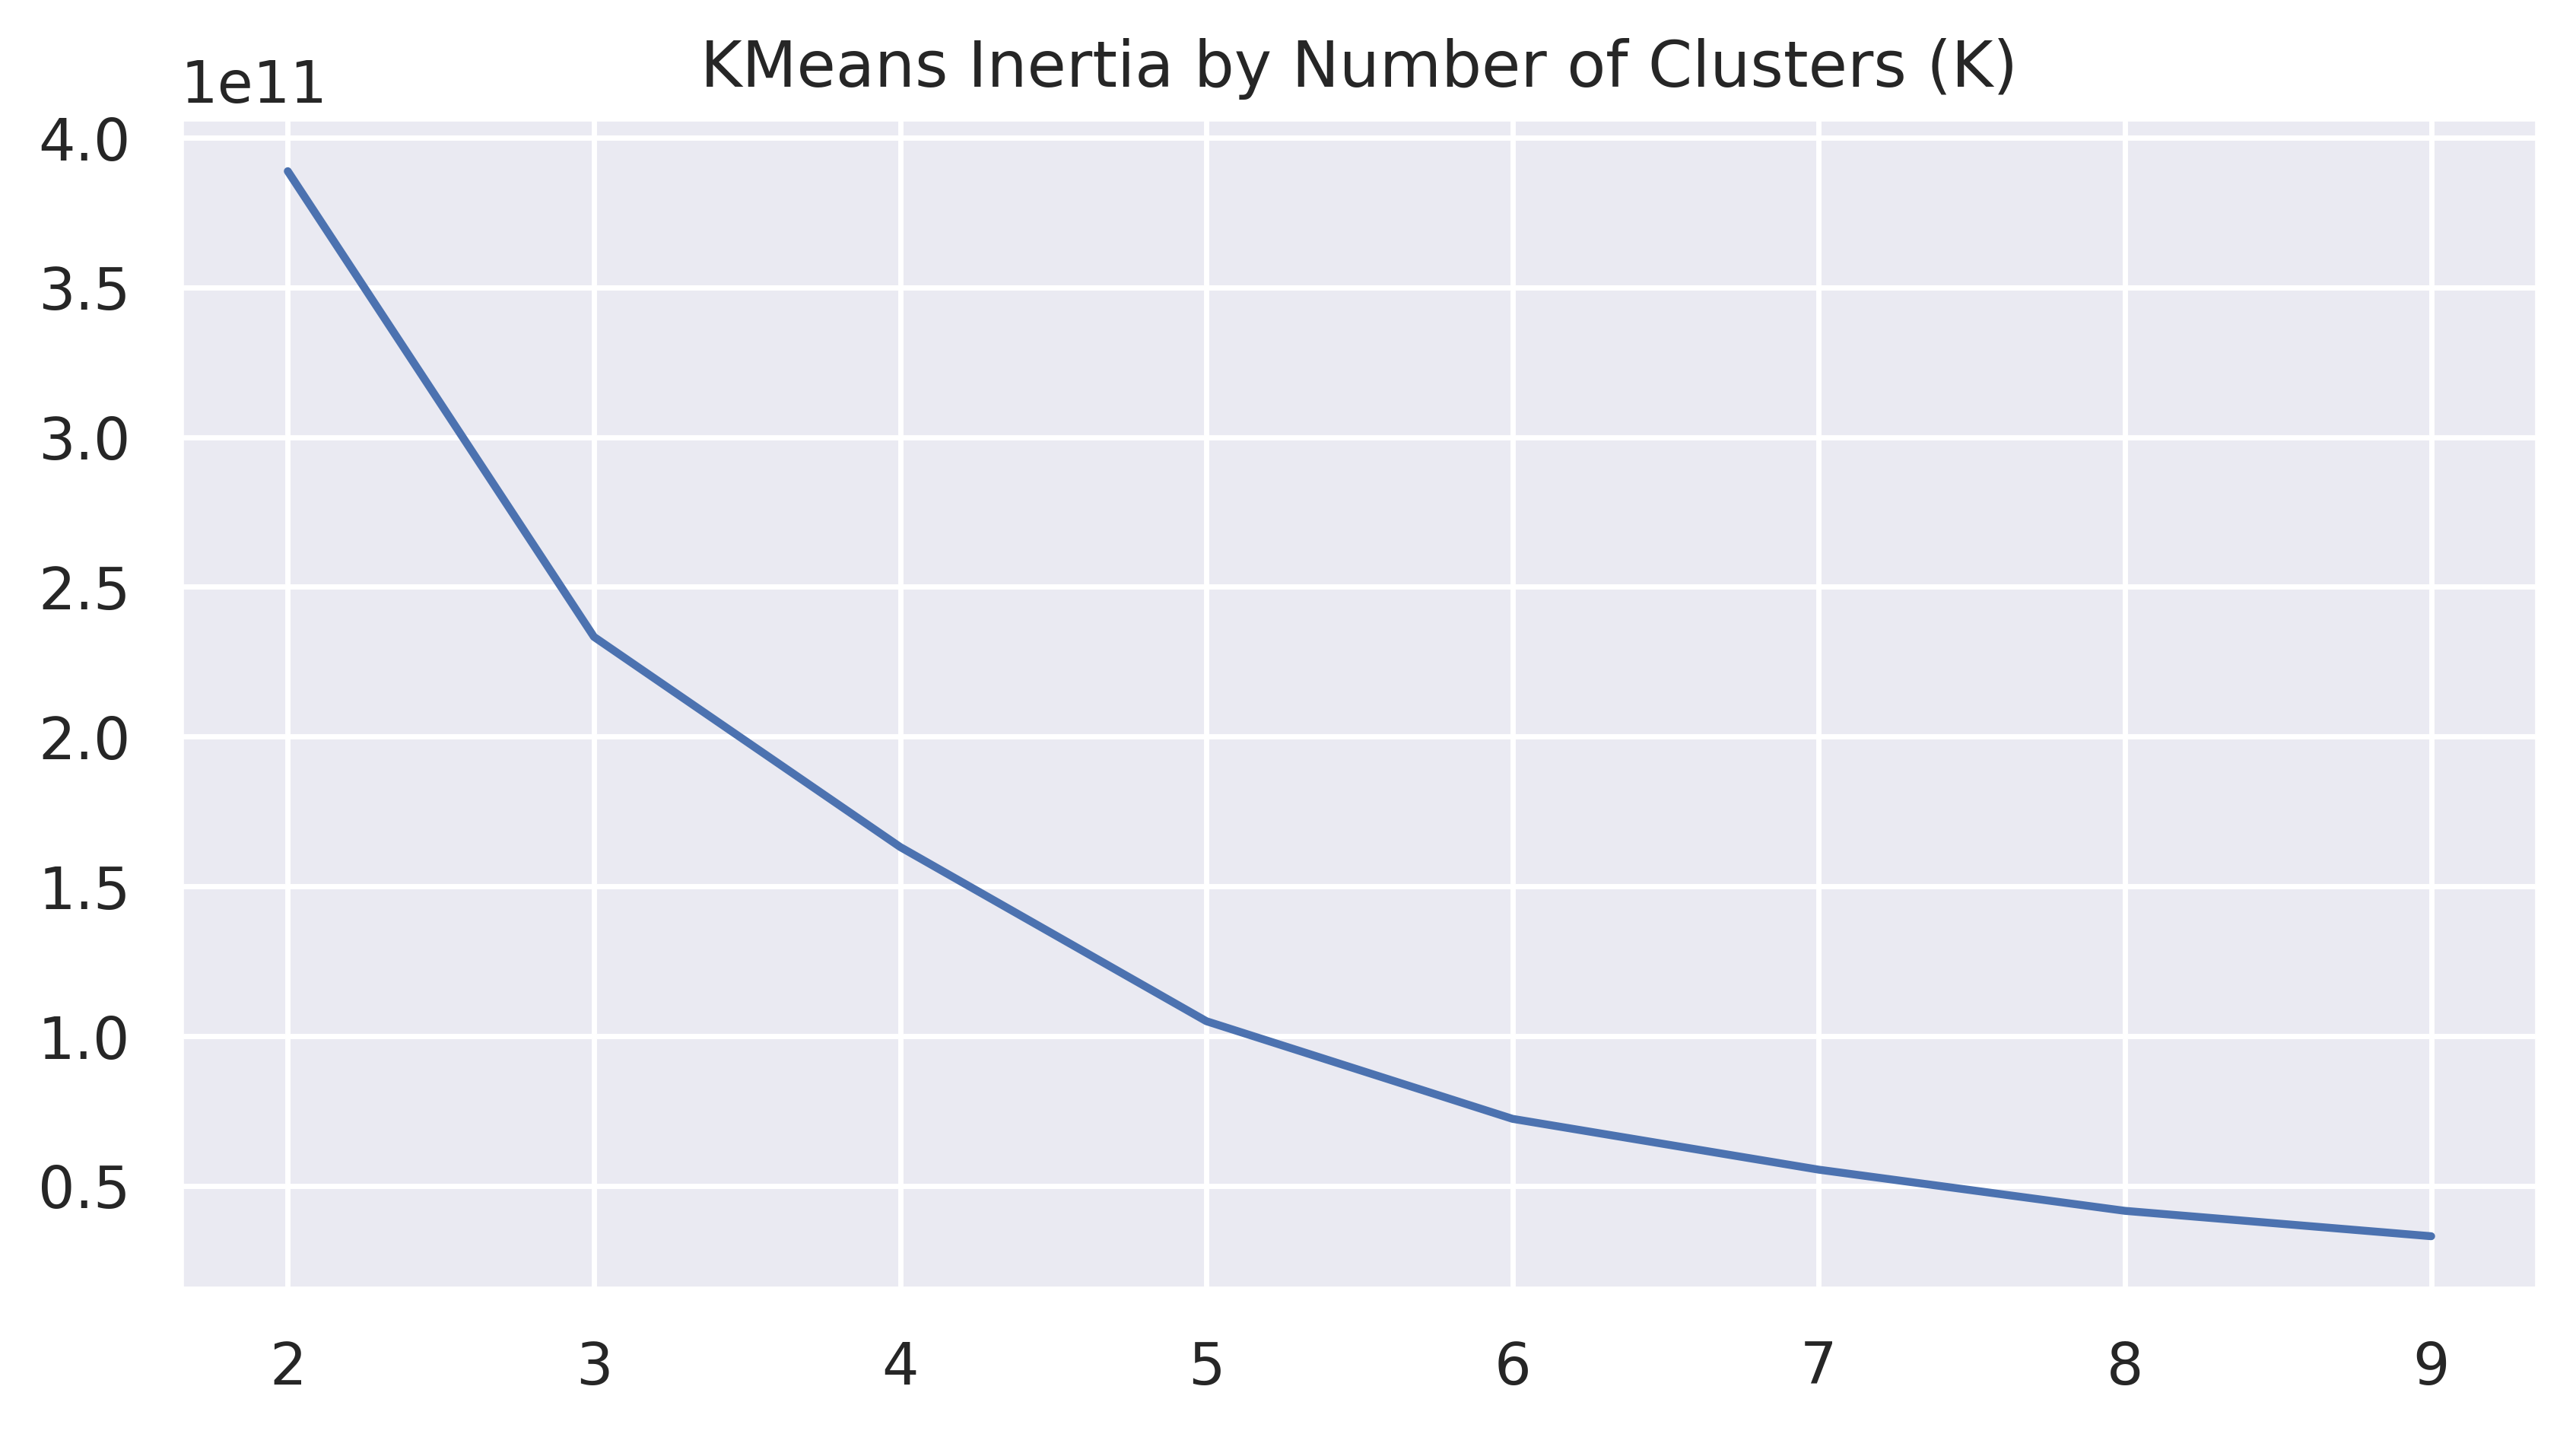

In [ ]:
# write code below

from util.compare_cluster_ks import compare_cluster_ks

compare_cluster_ks(data)

## Step 6: Train a predictive model of shopper value

Once clusters exist, you can explore whether simple models capture predictable patterns in shopper behavior.

### Plan
Create a plan to:
- train a regression model to predict total spend
- evaluate performance using held-out data
- compare predictions across clusters

### Validate
- use regression-appropriate models
- evaluate on unseen data
- produce a concrete evaluation artifact

### Execute
Train and evaluate the predictive models.

### Check
- Inspect model error metrics.
- Identify whether prediction quality differs meaningfully across clusters.

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn import metrics
import scipy
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import cross_val_score

def evaluate_cross_validation_accuracy(x, y, *models):
    width = 0.35         # the width of the bars
    fig, ax = plt.subplots()
    model_performances = {}
    for count, model in enumerate(models):
        model_performances[model] = 0
        name = str(model.__class__).rpartition(".")[2].replace("'","").replace(">","")
        nrmse = cross_val_score(estimator = model, X=x,y=y,scoring='neg_root_mean_squared_error', cv =5)
        #print(nrmse.mean()*-1)
        #rmse = [abs(x) for x in nrmse]
        #print([abs(x) for x in nrmse])

        #scoring = ['neg_mean_squared_error', 'r2']
        #cv = cross_validate(model, x, y, scoring='neg_mean_squared_error')
        #scores = CV.cross_val_score(model, x, y, cv=5, scoring='neg_mean_squared_error')
        #scores = cross_val_score(model, x, y, cv=5)
        #print(scores)
        #print(f"{round(cv['test_score'].mean()*100,2)}% mean accuracy for {model}")
        #print(cv)
        model_performances[model] = '{}'.format(round(nrmse.mean()*-1,2))
        #results = [mean_squared_error(preds, y_test), explained_variance_score(preds, y_test), r2_score(preds, y_test)]
        results = [float(abs(x)) for x in nrmse]
        folds = len(results)
        ind = np.arange(folds)    # the x locations for the groups
        ax.bar(ind+width*count, results, width, bottom=0, label=name)

    ax.set_title('RMSE Performance by Model by Fold')
    plt.ylim(0, 1000)
    fold_labels = ['F'+str(x) for x in range(1,folds+1)]
    plt.xticks(ticks=ind+(width/len(models)), labels=fold_labels)
    ax.legend()
    ax.autoscale_view()
    plt.show()
    return model_performances

def predict_by_cluster(df, model1, model2, scaler):
    def scale_data(df, scaler):
        #scaler = StandardScaler()
        scaled_df = scaler.fit_transform(df)
        return pd.DataFrame(scaled_df, index=df.index, columns=df.columns)
    # display(df)
    y_all = df['all_spend']
    x_all = scale_data(df.drop('all_spend',axis=1), scaler)
    m1 = model1.fit(x_all, y_all)
    m2 = model2.fit(x_all, y_all)
    # preds1 = m1.score(x_all, y_all)
    # preds2 = m2.score(x_all, y_all)
    cluster_predictors = {}
    for i in sorted(df['Cluster'].unique()):
        cluster_predictors[i] = {'specific': {}, 'general': {}}
        print(f'\nSummary for Cluster #{str(i)}')
        filtered_df = df[df['Cluster'] == i]
        # display(filtered_df.describe())
    # for cluster in sorted(df['Cluster'].unique()):
    #     filtered_df = df[df[cluster] == cluster]
        # filtered_df = df[[df['Cluster'] == cluster]]
        y = filtered_df['all_spend']
        x = scale_data(filtered_df.drop('all_spend',axis=1), scaler)
        cluster_predictors[i]['specific'] = evaluate_cross_validation_accuracy(x, y, model1, model2)
        m1preds = m1.predict(x)
        m1mse = root_mean_squared_error(y, m1preds)
        m2preds = m2.predict(x)
        m2mse = root_mean_squared_error(y, m2preds)
        cluster_predictors[i]['general'][model1] = '{}'.format(round(m1mse,2))
        cluster_predictors[i]['general'][model2] = '{}'.format(round(m2mse,2))

    print('\nSummary for All Clusters')
    y_all = df['all_spend']
    x_all = scale_data(df.drop('all_spend',axis=1), scaler)
    #overalls = evaluate_cross_validation_accuracy(x, y, model1, model2)
    print('\nComparing Model Performance by Cluster')
    for cluster in cluster_predictors.keys():
        print('Cluster #{} model prediction RMSE by model:'.format(cluster))
        for m, v in cluster_predictors[cluster]['specific'].items():
            print('\t{}:\n\t\t {}'.format(m, v))
        #print(cluster_predictors[cluster]['specific'])
        print('\nAll-cluster model prediction RMSE for cluster #{} by model:'.format(cluster))
        for m, v in cluster_predictors[cluster]['general'].items():
            print('\t{}:\n\t\t {}'.format(m, v))
        print('\n')


Summary for Cluster #0


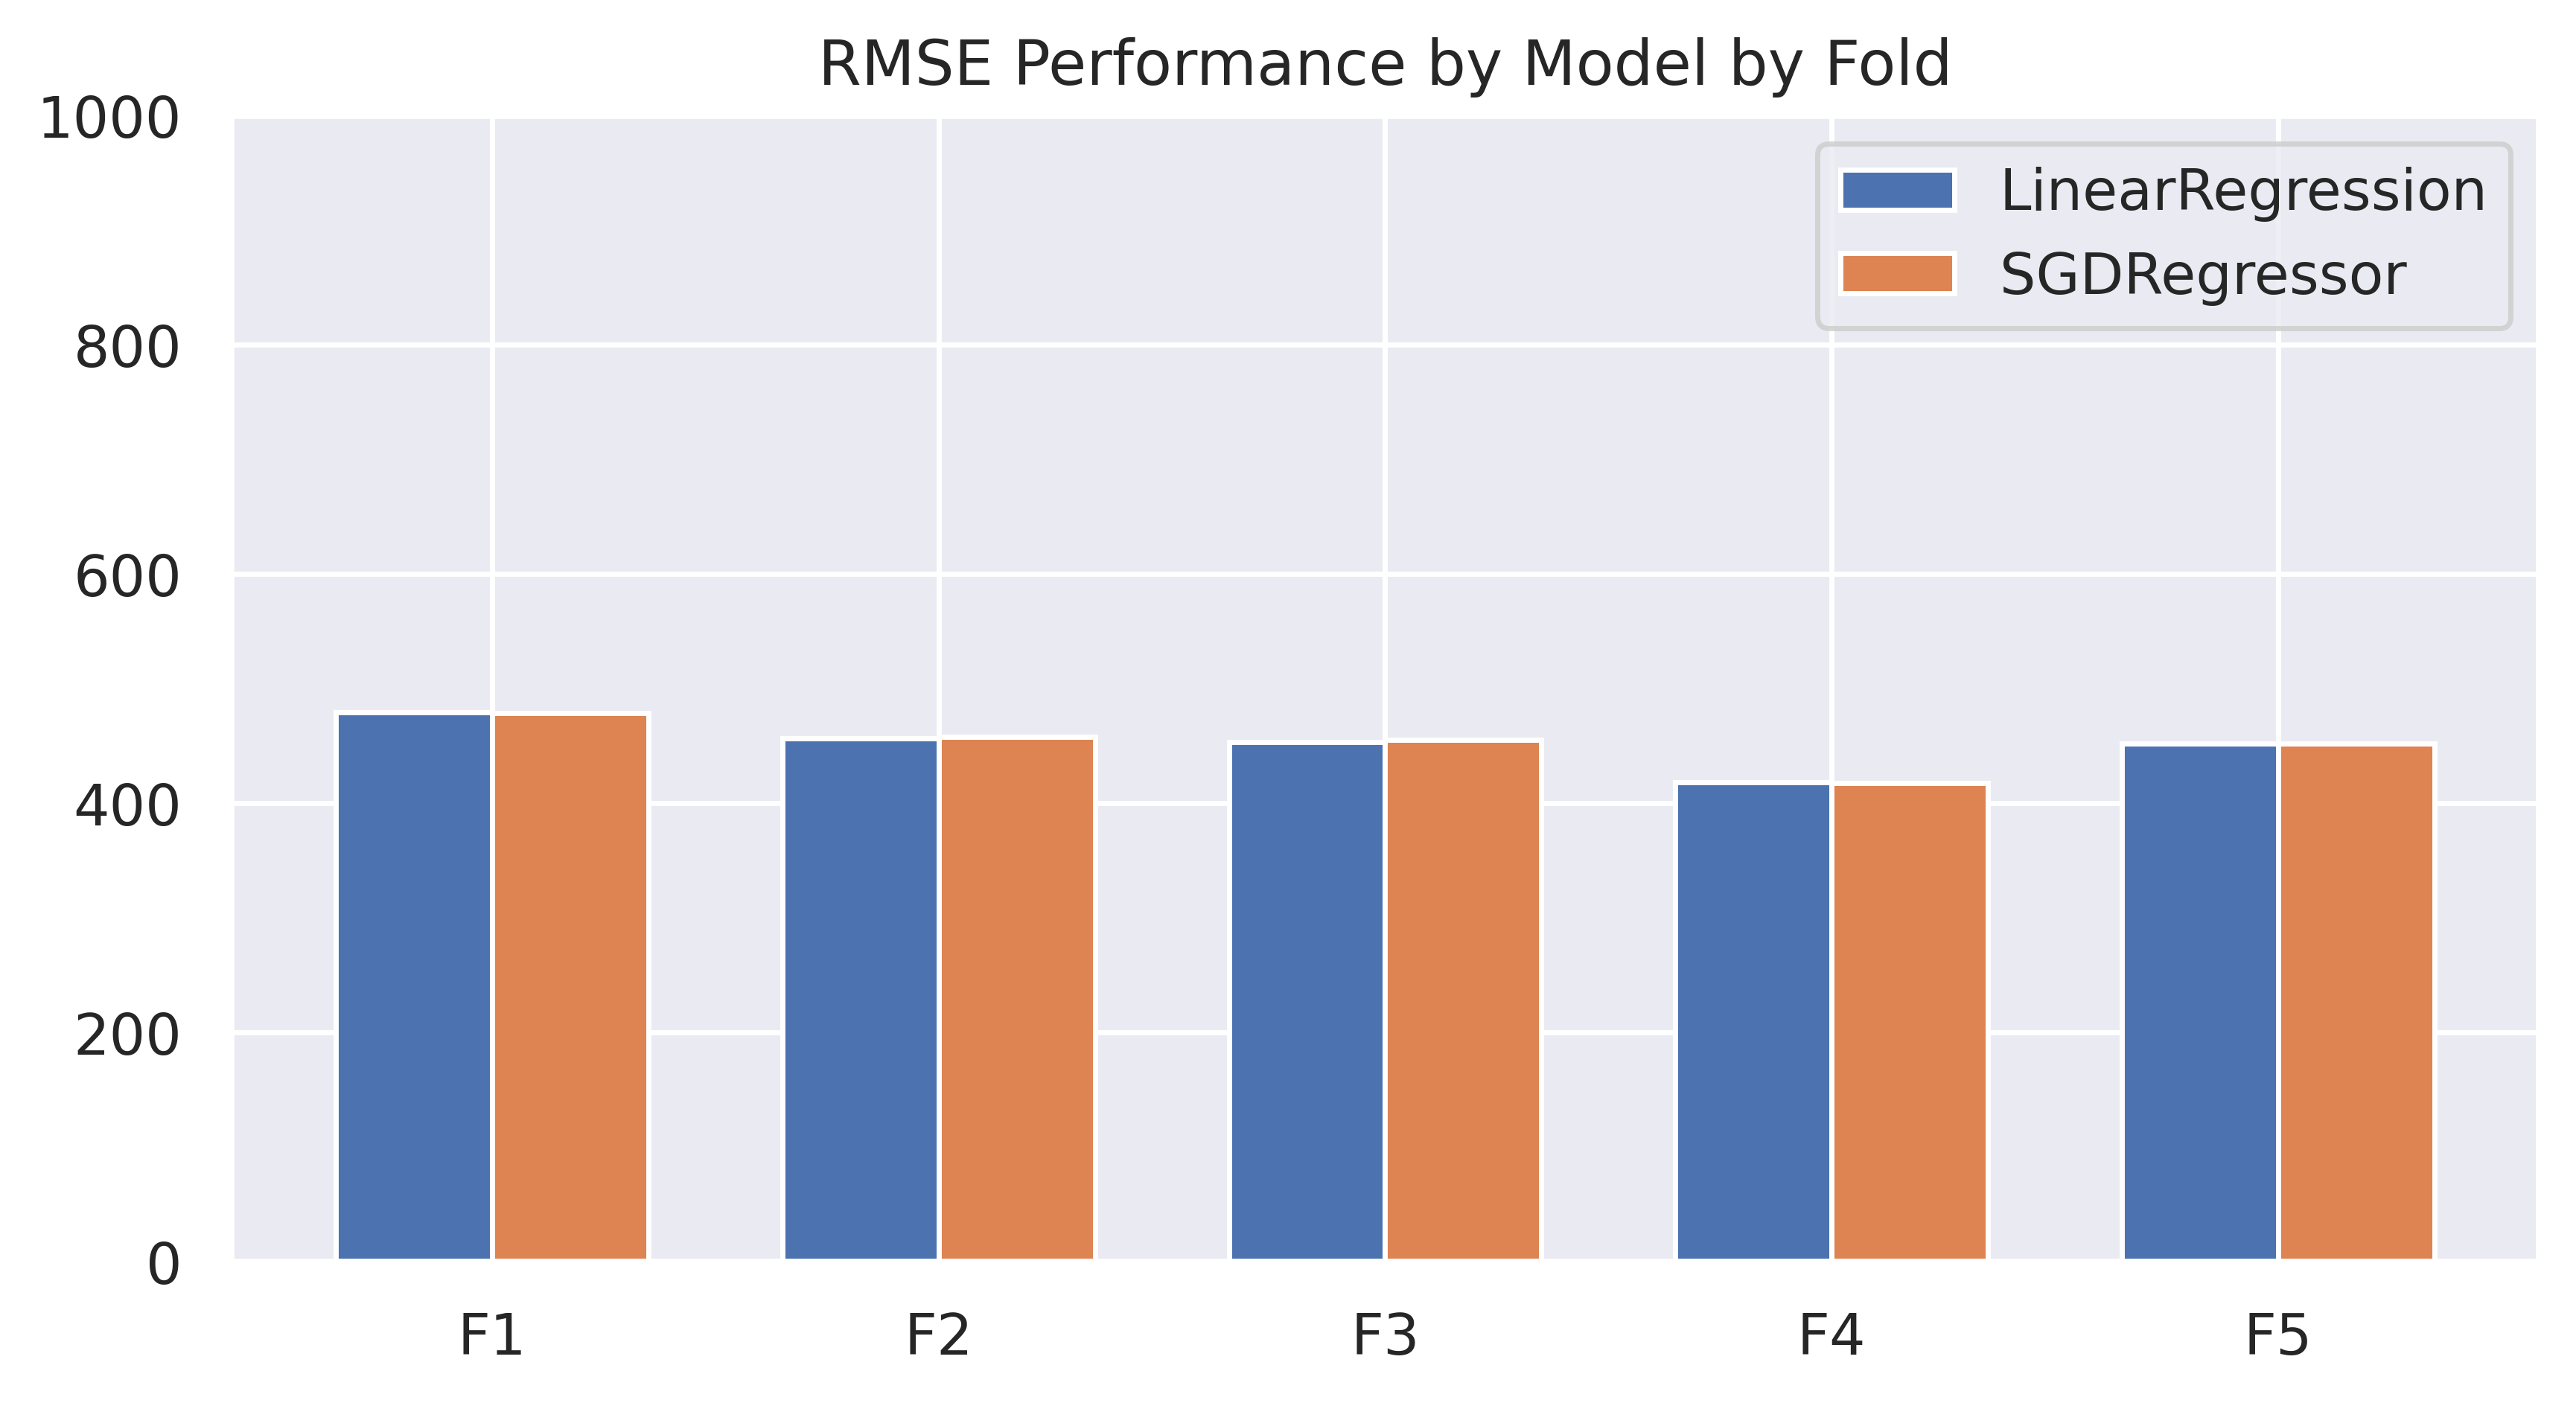


Summary for Cluster #1


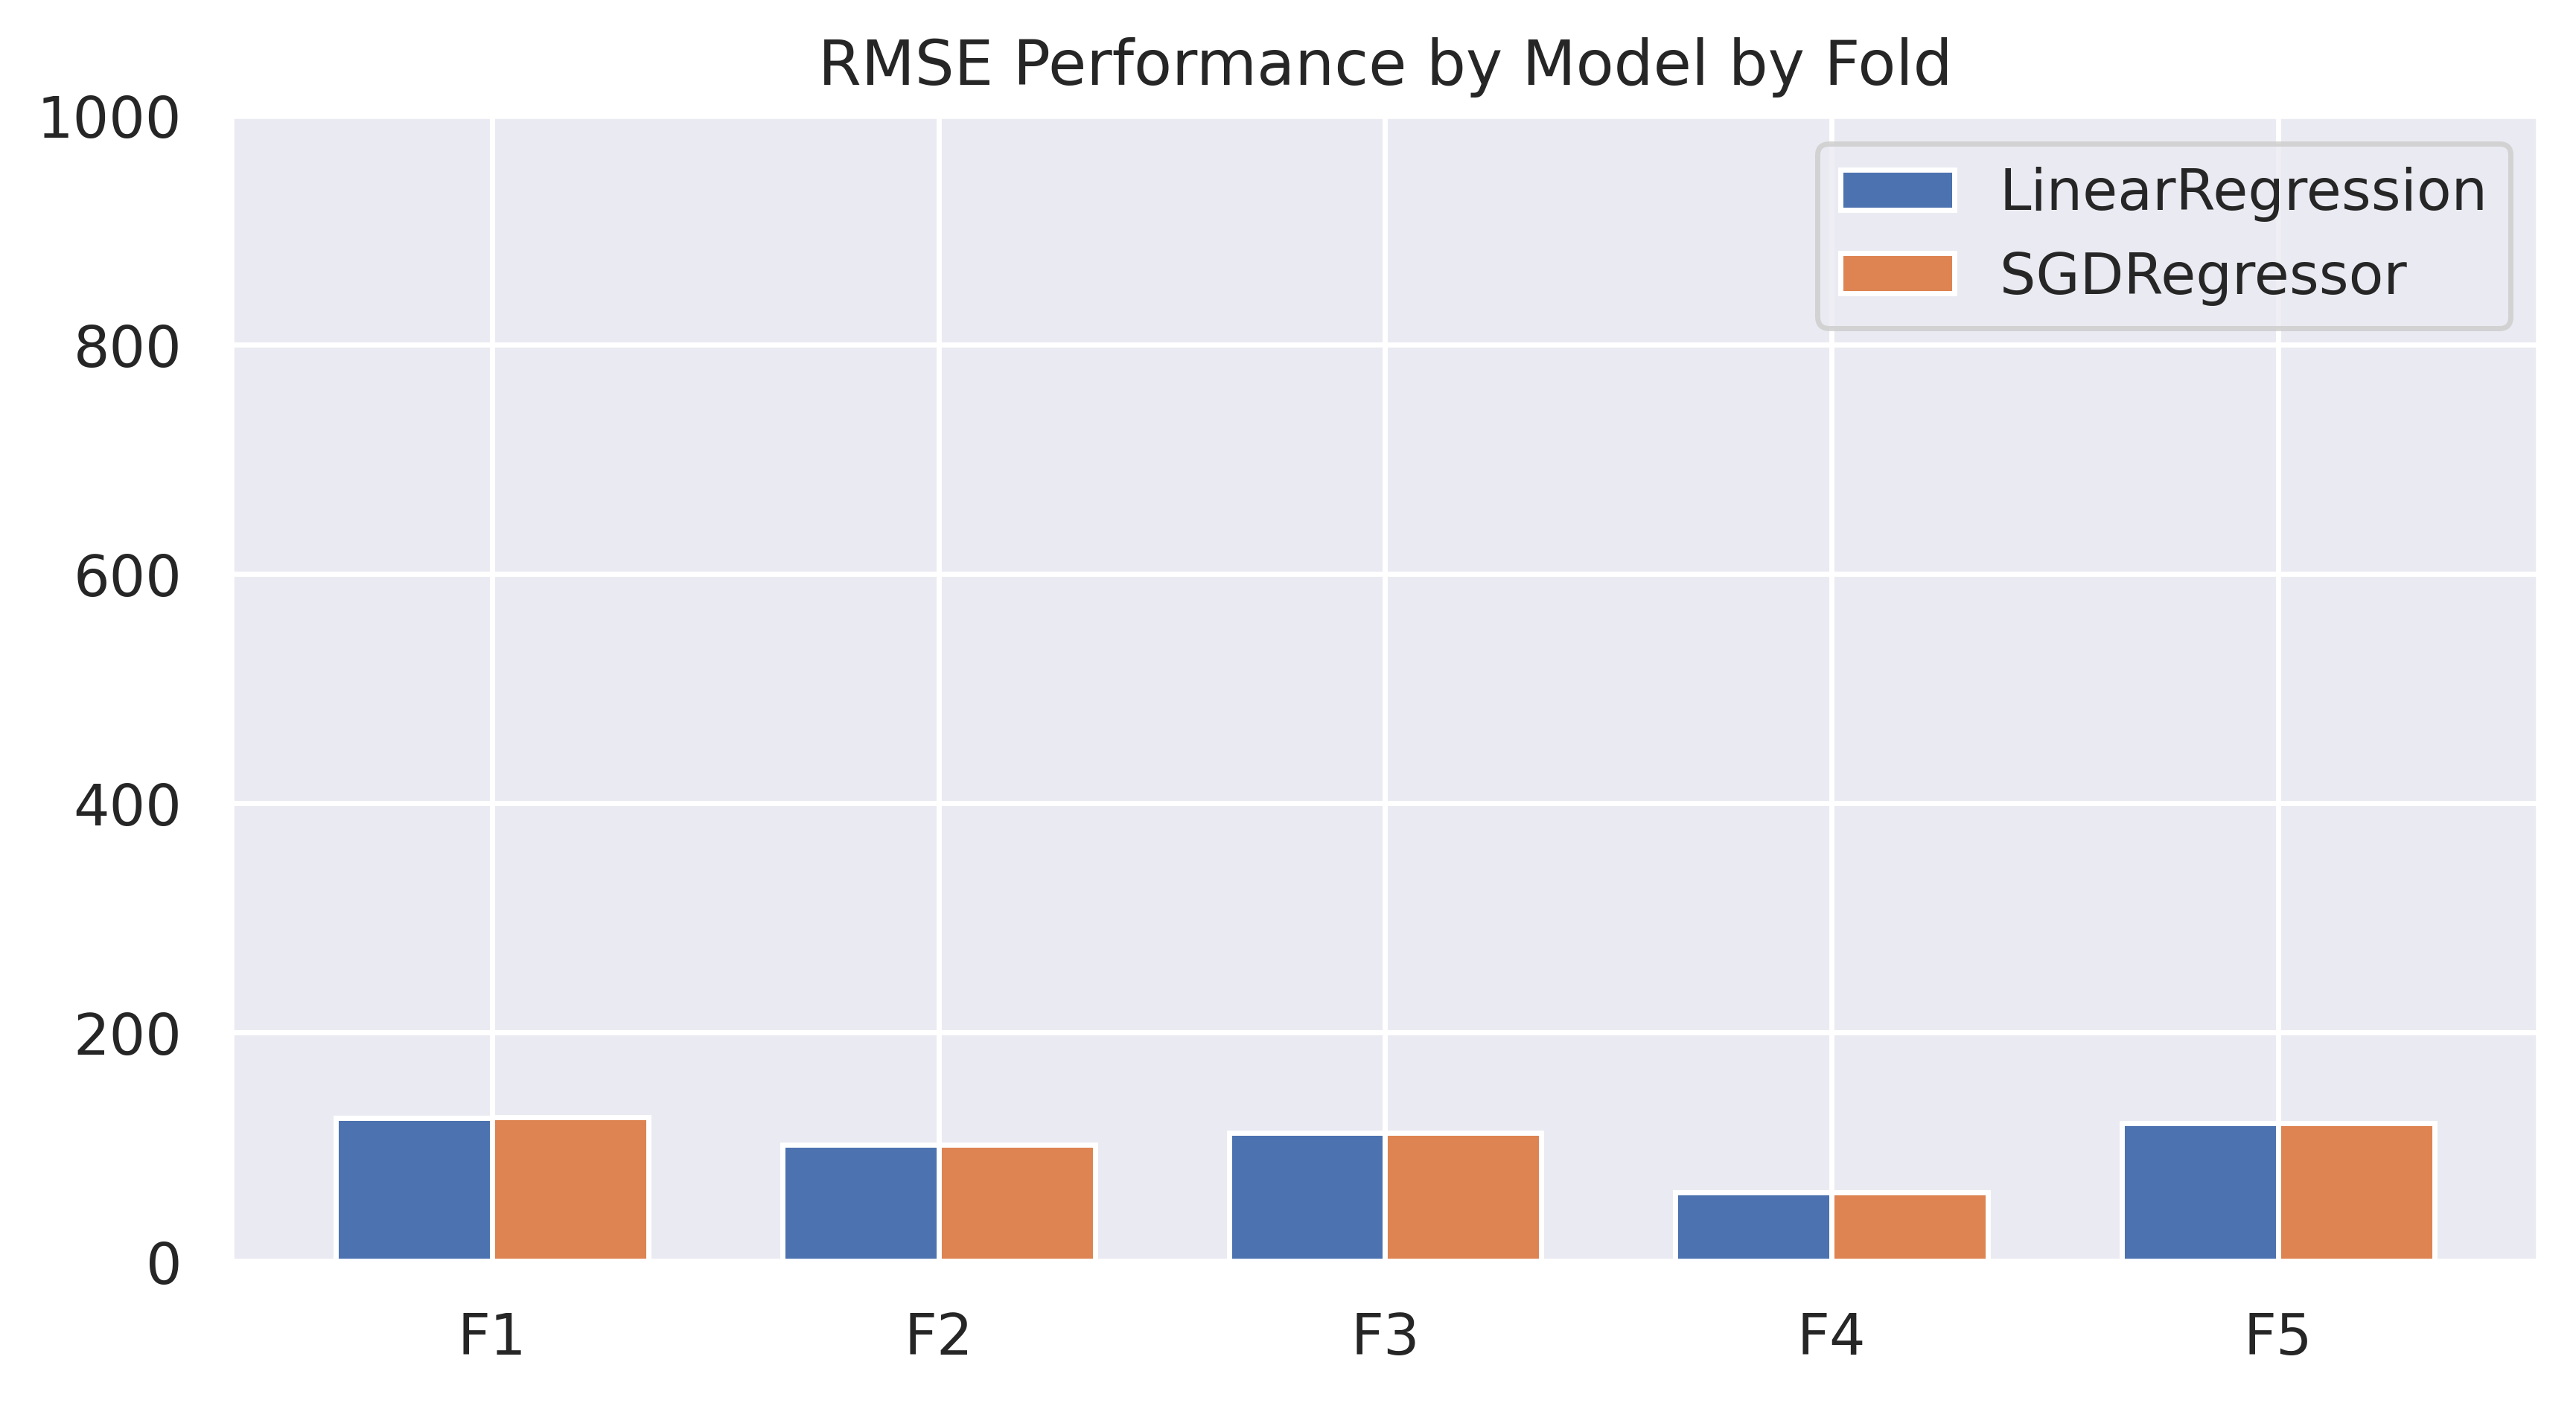


Summary for Cluster #2


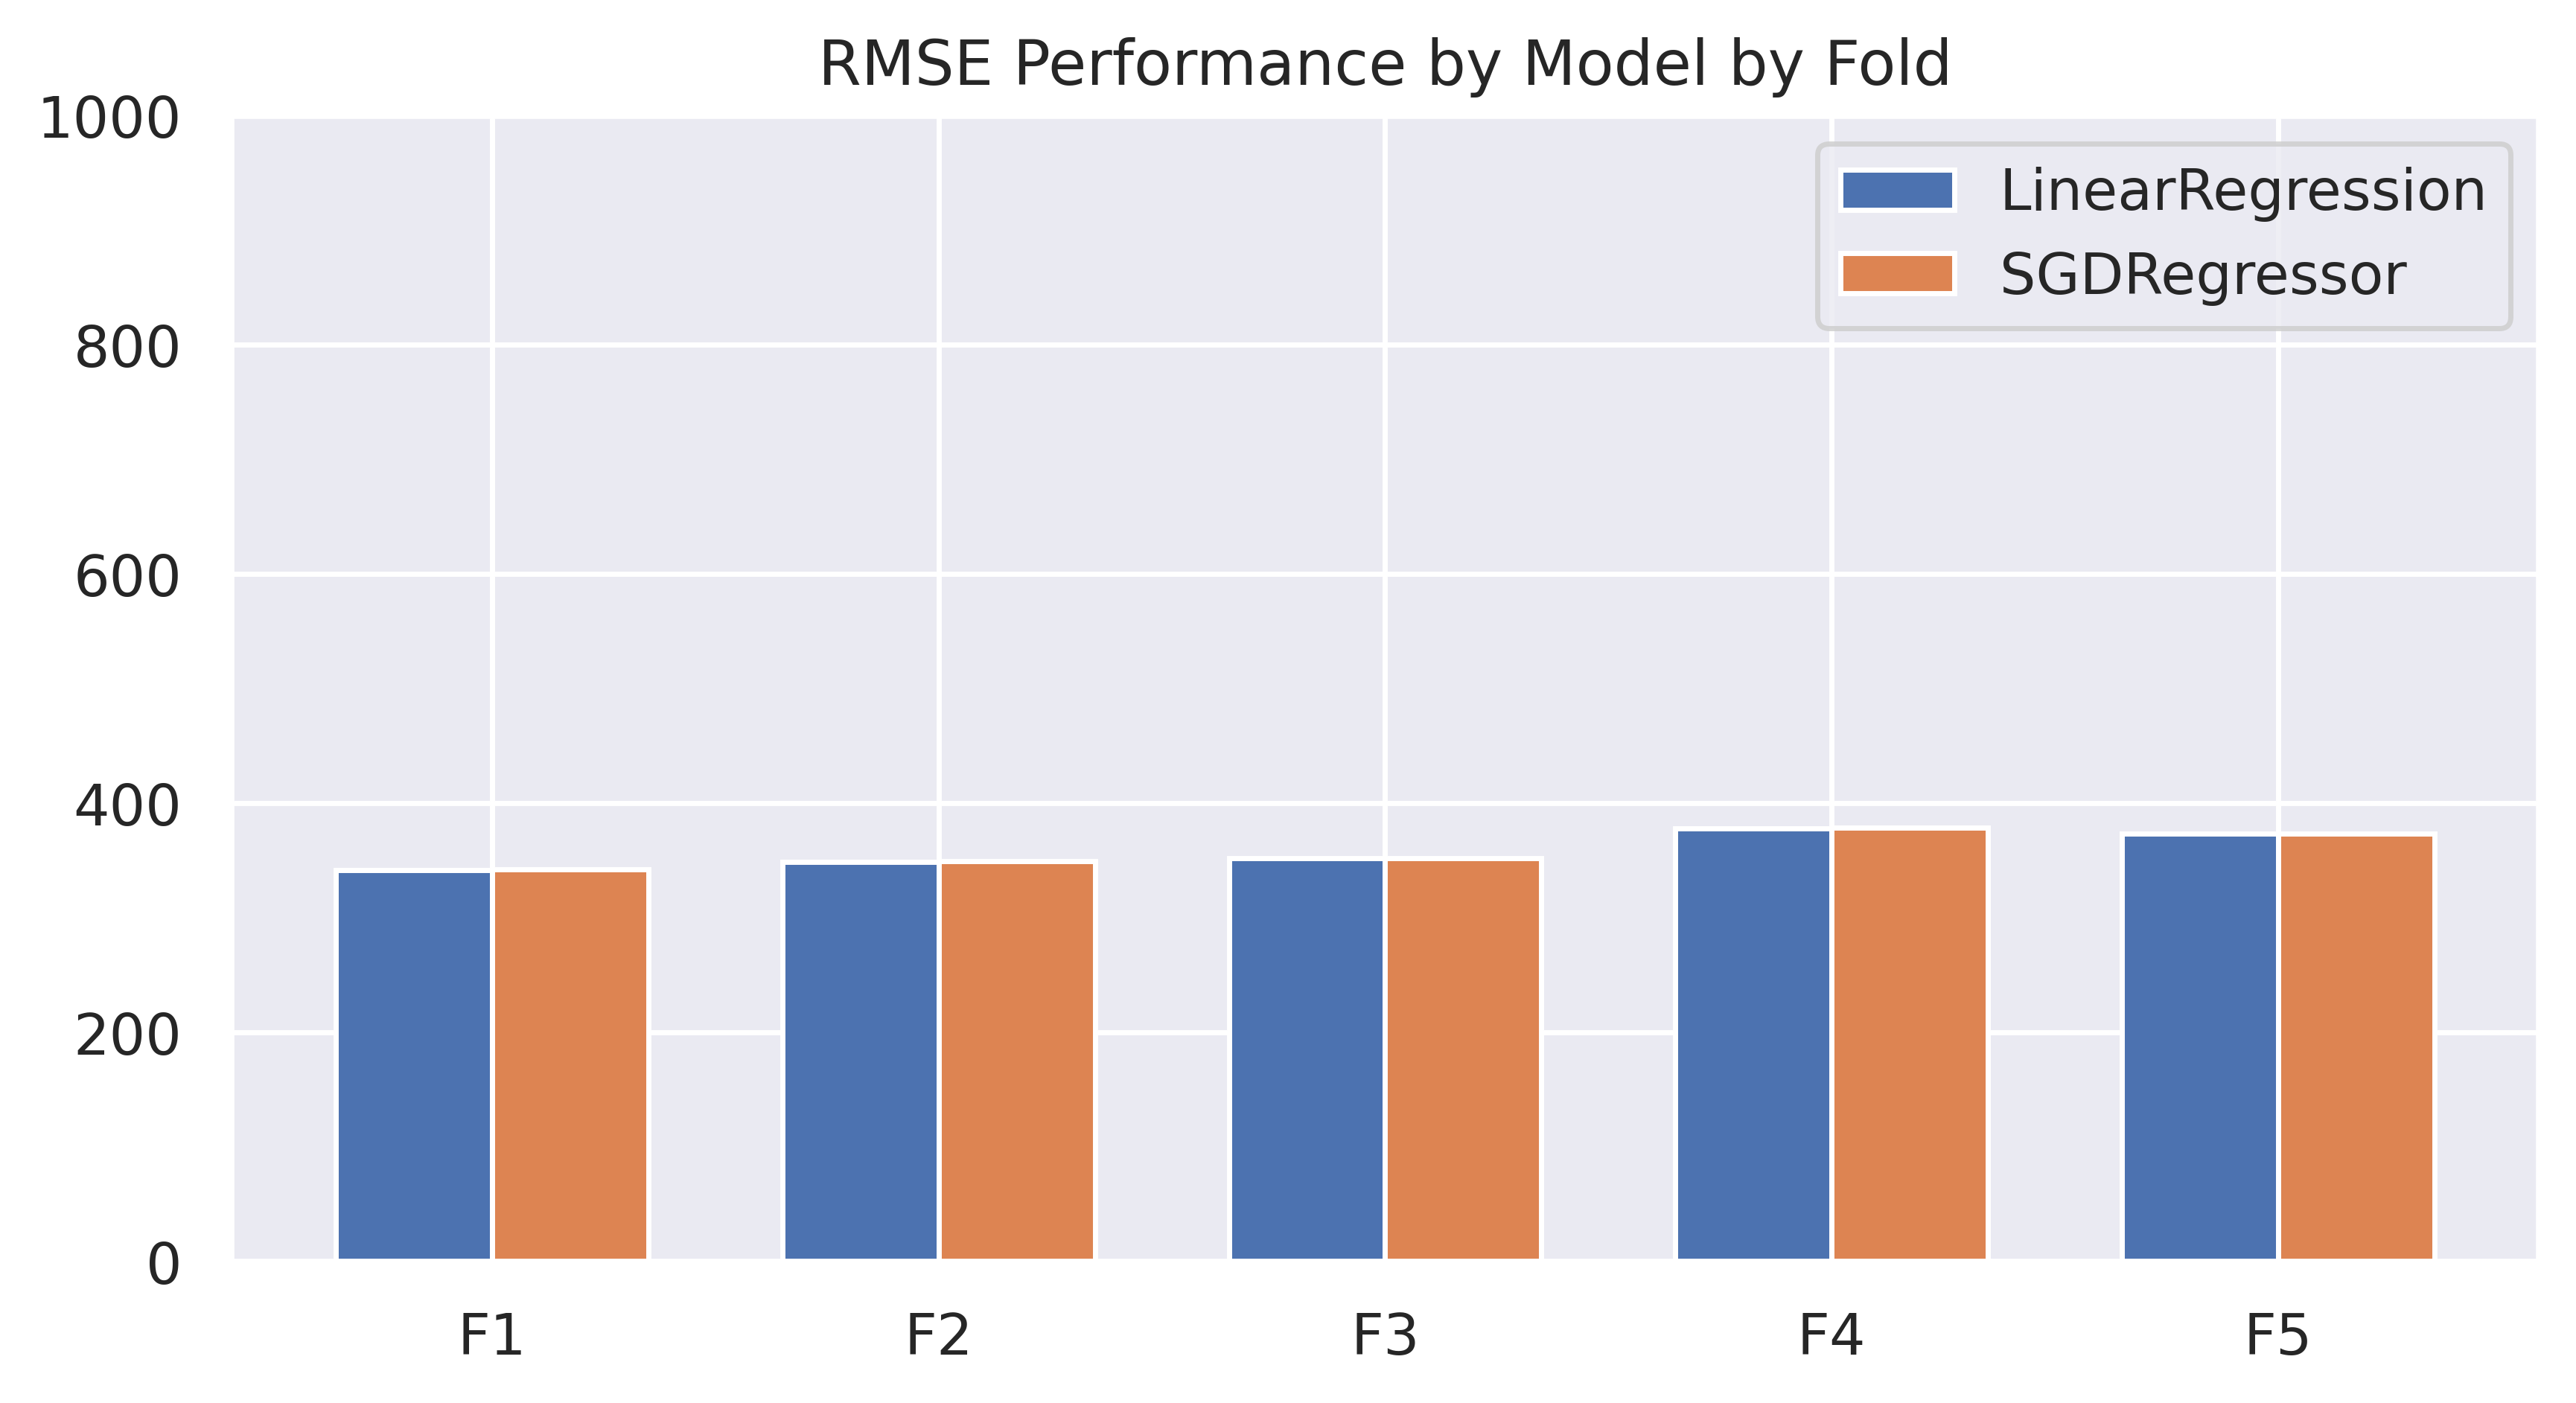


Summary for Cluster #3


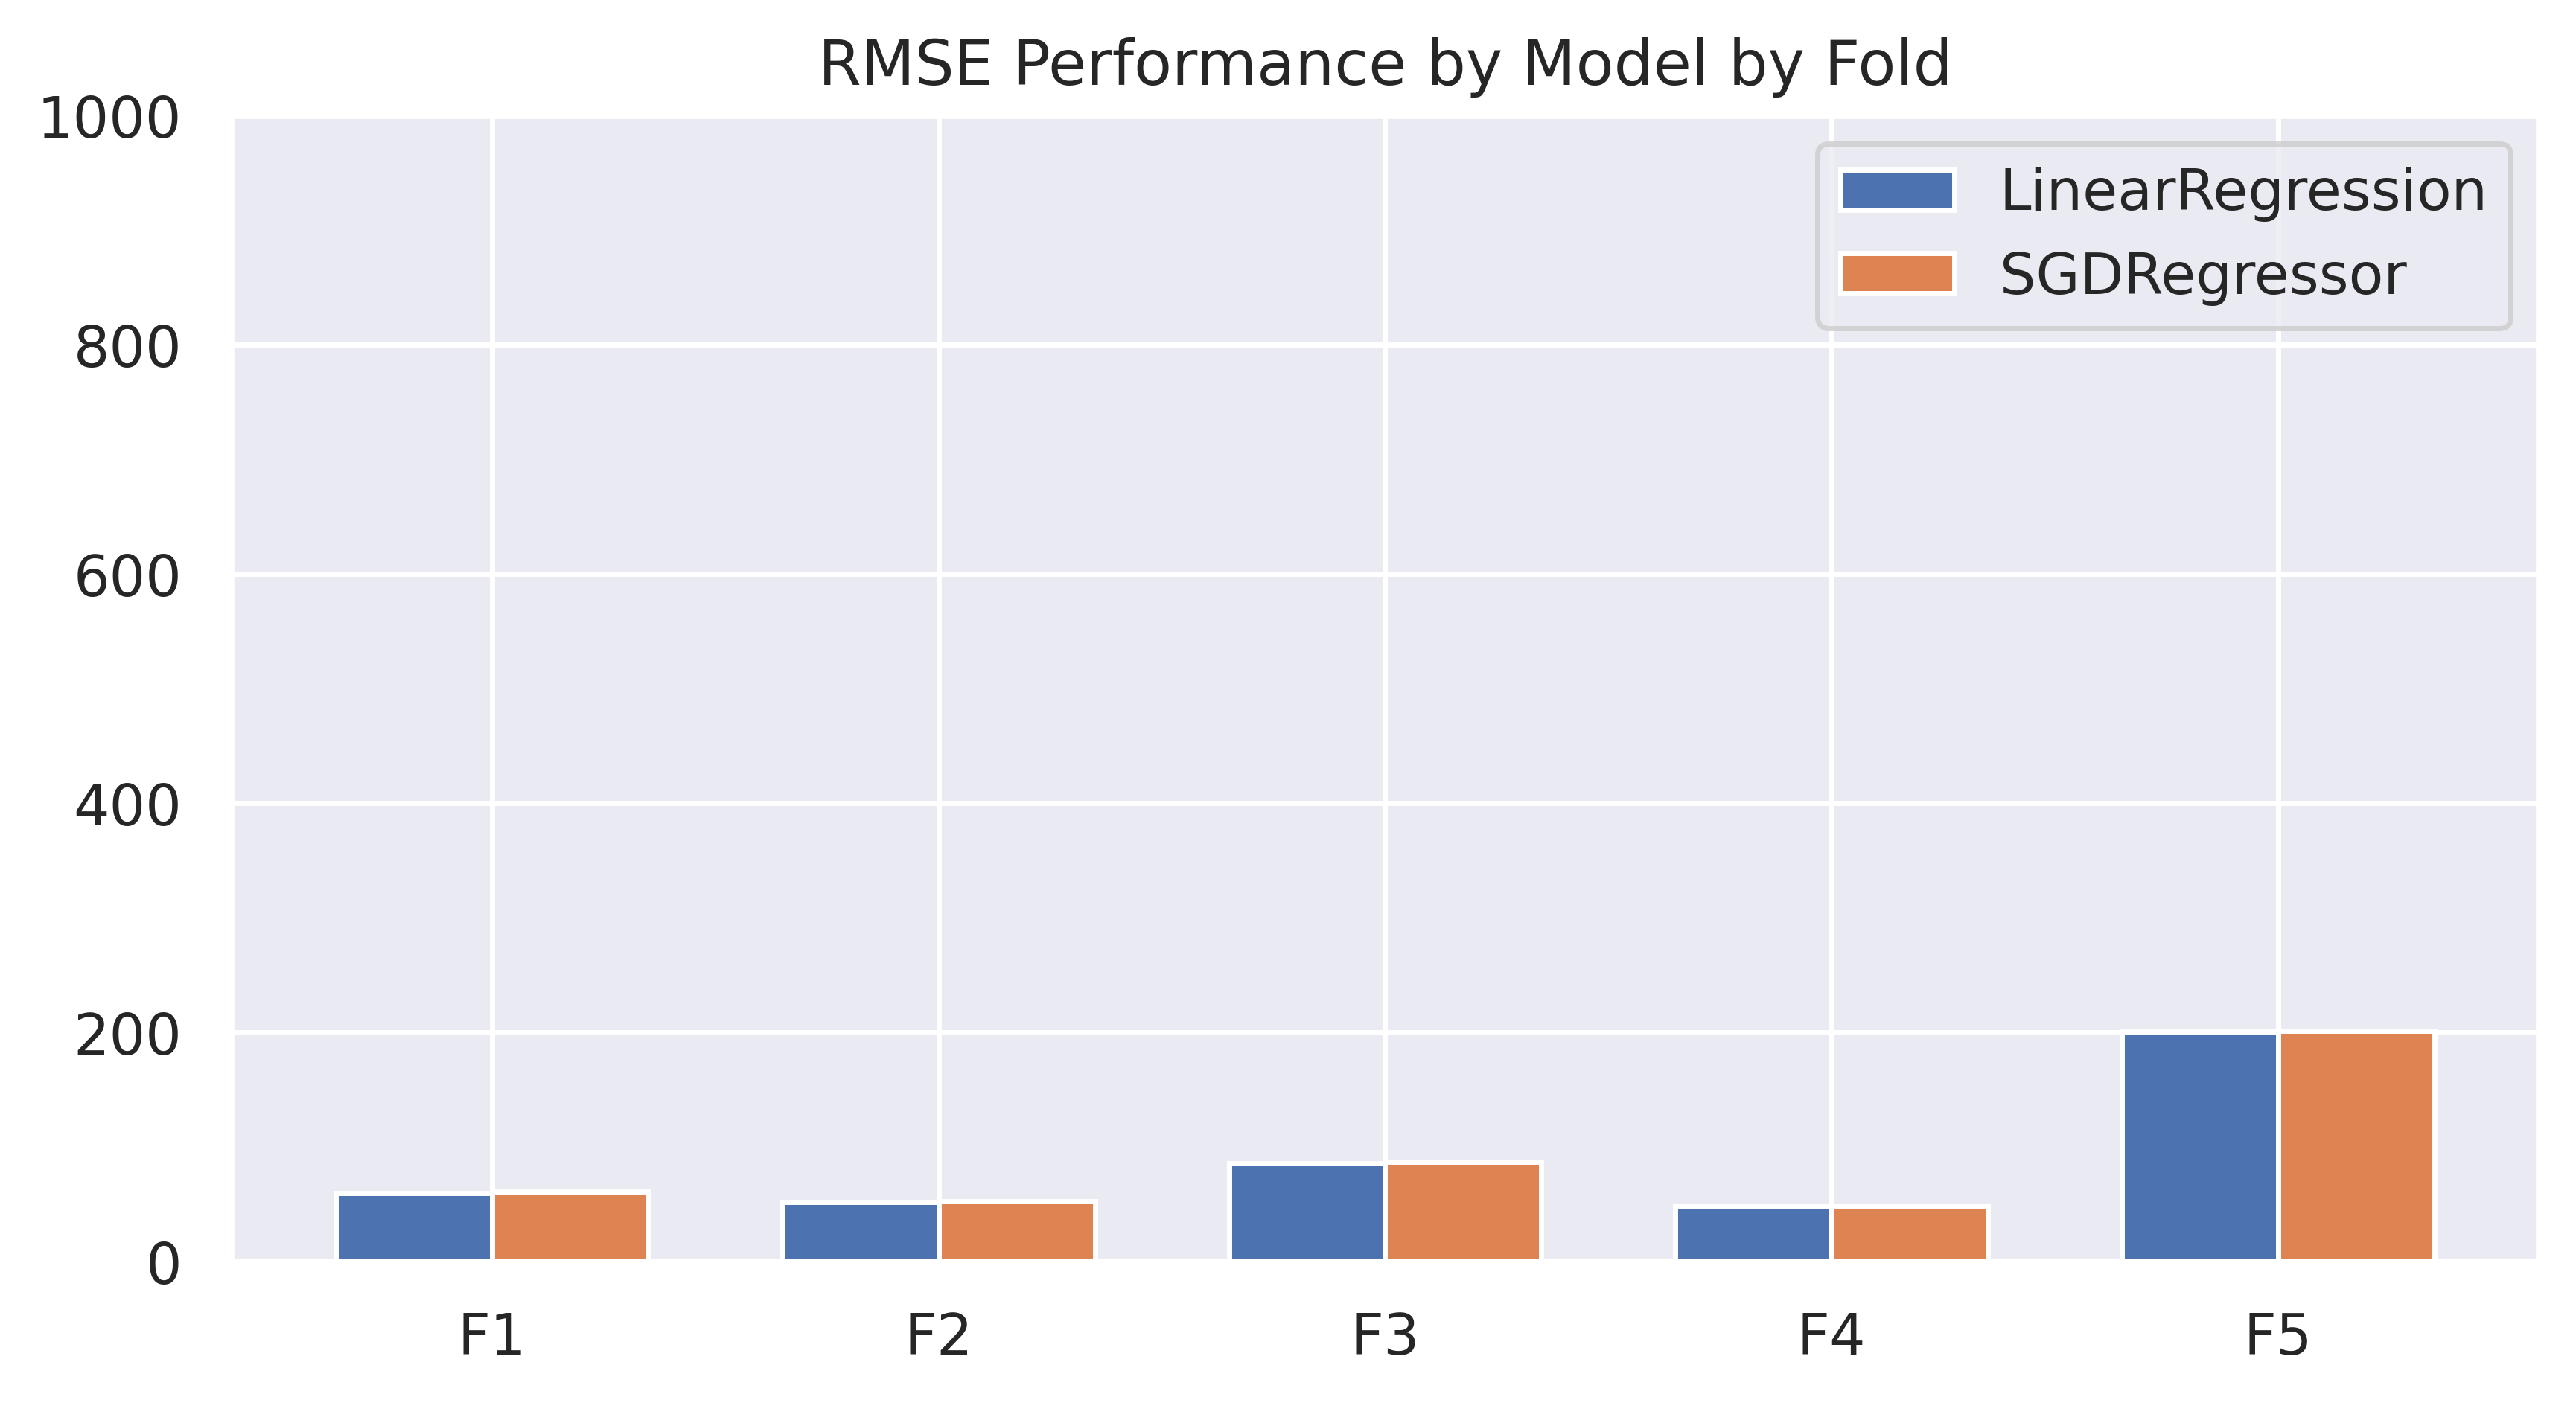


Summary for All Clusters

Comparing Model Performance by Cluster
Cluster #0 model prediction RMSE by model:
	LinearRegression():
		 451.87
	SGDRegressor():
		 452.26

All-cluster model prediction RMSE for cluster #0 by model:
	LinearRegression():
		 960.21
	SGDRegressor():
		 960.9


Cluster #1 model prediction RMSE by model:
	LinearRegression():
		 104.11
	SGDRegressor():
		 104.25

All-cluster model prediction RMSE for cluster #1 by model:
	LinearRegression():
		 481.67
	SGDRegressor():
		 478.79


Cluster #2 model prediction RMSE by model:
	LinearRegression():
		 358.83
	SGDRegressor():
		 358.96

All-cluster model prediction RMSE for cluster #2 by model:
	LinearRegression():
		 505.62
	SGDRegressor():
		 505.59


Cluster #3 model prediction RMSE by model:
	LinearRegression():
		 89.34
	SGDRegressor():
		 90.1

All-cluster model prediction RMSE for cluster #3 by model:
	LinearRegression():
		 670.34
	SGDRegressor():
		 668.51




In [ ]:
# write code below

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression

m1 = LinearRegression()
m2 = SGDRegressor(max_iter=1000, tol=1e-3)

predict_by_cluster(clusters, m1, m2, StandardScaler())

## Step 7: Train a model to assign new shoppers to clusters

To operationalize segmentation, new shoppers must be assigned to existing clusters.

### Plan
Create a plan to:
- train a classifier that predicts cluster membership from shopper features
- evaluate its accuracy on held-out data
- optionally tune model parameters

### Validate
- treat cluster assignment as a distinct prediction task
- evaluate performance explicitly
- avoid equating higher accuracy with 'better' clusters

### Execute
Train and evaluate the cluster-assignment model.

### Check
- Report cluster-assignment accuracy.
- Inspect at least one misclassified shopper.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, multilabel_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

def classify_into_clusters(df, model):
    def scale_data(df):
        scaler = StandardScaler()
        scaled_df = scaler.fit_transform(df)
        return pd.DataFrame(scaled_df, index=df.index, columns=df.columns)
    clusters = sorted(df['Cluster'].unique())
    y = df['Cluster']
    x = scale_data(df.drop('Cluster', axis=1))
    #x = scale_data(df.drop('all_spend',axis=1).drop('Cluster', axis=1))
    # display(x)
    # display(y)
    model.fit(x, y)
    preds = model.predict(x)
    #confusionmatrix = confusion_matrix(y, preds)
    #print(multilabel_confusion_matrix(y, preds, labels=clusters))
    scores = precision_recall_fscore_support(y, preds, average=None, labels=clusters)
    #print(precision_recall_fscore_support)
    confusionmatrix = multilabel_confusion_matrix(y, preds, labels=clusters)
    for count, cluster in enumerate(confusionmatrix):
        print(f'Confusion matrix (y=[ACTUAL other, ACTUAL cluster{clusters[count]}], x=[PREDICTED other, PREDICTED cluster {clusters[count]}] for class cluster {clusters[count]}:' )
        print(cluster)
        print('Precision-->\t{}'.format(scores[0][count]))
        print('Recall-->\t{}'.format(scores[1][count]))
        print('F-Beta-->\t{}'.format(scores[2][count]))
        #print(scores[count])
        print('\n')

In [ ]:
# write code below

from util.classify_into_clusters import classify_into_clusters
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)

classify_into_clusters(latest_clusters, clf)

Confusion matrix (y=[ACTUAL other, ACTUAL cluster0], x=[PREDICTED other, PREDICTED cluster 0] for class cluster 0:
[[1728    0]
 [   6  415]]
Precision-->	1.0
Recall-->	0.8551165146909828
F-Beta-->	0.998211091234347


Confusion matrix (y=[ACTUAL other, ACTUAL cluster1], x=[PREDICTED other, PREDICTED cluster 1] for class cluster 1:
[[1162  143]
 [   0  844]]
Precision-->	0.9857482185273159
Recall-->	1.0
F-Beta-->	0.998211091234347


Confusion matrix (y=[ACTUAL other, ACTUAL cluster2], x=[PREDICTED other, PREDICTED cluster 2] for class cluster 2:
[[1589    1]
 [   1  558]]
Precision-->	0.992822966507177
Recall-->	0.9219006007646096
F-Beta-->	0.998211091234347


Confusion matrix (y=[ACTUAL other, ACTUAL cluster3], x=[PREDICTED other, PREDICTED cluster 3] for class cluster 3:
[[1824    0]
 [ 137  188]]
Precision-->	421
Recall-->	844
F-Beta-->	559




In [ ]:
from sklearn.model_selection import GridSearchCV

def get_optimal_parameters(df, model):
    def scale_data(df):
        scaler = StandardScaler()
        scaled_df = scaler.fit_transform(df)
        return pd.DataFrame(scaled_df, index=df.index, columns=df.columns)
    def get_x_y(df):
        y = df['Cluster']
        x = scale_data(df.drop('all_spend',axis=1).drop('Cluster', axis=1))
        return (x, y)
    param_grid = {
        'n_estimators': [200, 700],
        'max_features': ['auto', 'sqrt', 'log2']
    }
    x, y = get_x_y(df)
    gscv_clf = GridSearchCV(estimator=model, param_grid=param_grid, cv= 5)
    gscv_clf.fit(x, y)
    print(gscv_clf.best_params_)

In [ ]:
# write code below

get_optimal_parameters(clusters, clf)

{'max_features': 'log2', 'n_estimators': 700}


In [ ]:
clf_tuned = RandomForestClassifier(max_depth=2, random_state=0, max_features='log2', n_estimators=700)

classify_into_clusters(clusters, clf_tuned)

Confusion matrix (y=[ACTUAL other, ACTUAL cluster0], x=[PREDICTED other, PREDICTED cluster 0] for class cluster 0:
[[1728    0]
 [  17  404]]
Precision-->	1.0
Recall-->	0.8448448448448449
F-Beta-->	0.9792060491493384


Confusion matrix (y=[ACTUAL other, ACTUAL cluster1], x=[PREDICTED other, PREDICTED cluster 1] for class cluster 1:
[[1150  155]
 [   0  844]]
Precision-->	0.9596199524940617
Recall-->	1.0
F-Beta-->	0.9266547406082289


Confusion matrix (y=[ACTUAL other, ACTUAL cluster2], x=[PREDICTED other, PREDICTED cluster 2] for class cluster 2:
[[1579   11]
 [  41  518]]
Precision-->	0.9793939393939394
Recall-->	0.9158979924036896
F-Beta-->	0.9522058823529411


Confusion matrix (y=[ACTUAL other, ACTUAL cluster3], x=[PREDICTED other, PREDICTED cluster 3] for class cluster 3:
[[1824    0]
 [ 108  217]]
Precision-->	421
Recall-->	844
F-Beta-->	559




## End of Act 2

At this point, you should have some concrete experience with unsupervised and supervised learning methods and the ways in which they may help in identifying high-value shoppers.

Before moving on to Act III, create a file named `README.md` in the project root.

This README should capture the current state of the prototype as if you were handing it off to a colleague. Keep it concise and grounded in what actually exists.

### 1. What this prototype does
In one sentence, clearly describe the capability that was built and the problem it is intended to address.

### 2. How it works (at a high level)
In a few bullet points, specify:
- what data the system operates over,
- what representation or model it uses,
- how results are produced.

### 3. Limitations and open questions
Briefly note:
- the most important limitations you observed or conceive of, and
- any open questions that would need to be addressed before broader use.


This README will be used as reference context in Act 3.

## Act 3 — Socialize the Work

You have built a working prototype. Now you need to think about what it would mean to use it.

In this act, you will have conversations with three "colleagues" who approach this feature from different professional perspectives:

- A **Shopper Experience Lead** focused on how marketing messages, offers, and recommendations are perceived by customers.

- A **Category Strategy Lead** responsible for portfolio balance, category performance, and long-term revenue mix.

- A **Marketing Ops Manager** responsible for executing campaigns at scale and managing the practical constraints of data, tooling, and workflow.

Each of these perspectives highlights a different set of circumstantial concerns that emerge once a technical capability is placed inside an organization and exposed to real use.

Your goal in these conversations is to engage with those concerns. This means:
- explaining how the prototype behaves and performs,
- articulating tradeoffs in plain, cross-functional language,
- and reckoning with how technical choices intersect with human expectations, organizational processes, and downstream impact.

Each conversation should feel like a real internal discussion. When a persona has what they need to understand your reasoning and its implications, the conversation will naturally come to a close.

### Submission

- No need to submit a walkthrough - we're all done!